<!-- **Table of contents**<a id='toc0_'></a>    
- 1. [导入模块](#toc1_)    
- 2. [Statistics](#toc2_)    
- 3. [Explorer](#toc3_)    
- 4. [采样地图](#toc4_)    
  - 4.1. [采样点地图信息](#toc4_1_)    
  - 4.2. [生态信息](#toc4_2_)    
- 5. [Diversity analysis](#toc5_)    
  - 5.1. [beta](#toc5_1_)    
  - 5.2. [alpha](#toc5_2_)    
    - 5.2.1. [read alpha txt](#toc5_2_1_)    
    - 5.2.2. [merge metainfo and alpha](#toc5_2_2_)    
  - 5.3. [check](#toc5_3_)    
    - 5.3.1. [线性回归](#toc5_3_1_)    
    - 5.3.2. [多项式回归](#toc5_3_2_)    
    - 5.3.3. [核回归](#toc5_3_3_)    
    - 5.3.4. [集成学习结合shap](#toc5_3_4_)    
      - 5.3.4.1. [Linear shap](#toc5_3_4_1_)    
      - 5.3.4.2. [Random forest shap](#toc5_3_4_2_)    
      - 5.3.4.3. [XGBoost shap](#toc5_3_4_3_)    
  - 5.4. [Soil pH](#toc5_4_)    
  - 5.5. [Latitude](#toc5_5_)    
  - 5.6. [Part](#toc5_6_)    
  - 5.7. [Area](#toc5_7_)    
  - 5.8. [Longitude](#toc5_8_)    
  - 5.9. [Altitude](#toc5_9_)    
  - 5.10. [Temperature](#toc5_10_)    
  - 5.11. [Precipitation](#toc5_11_)    
  - 5.12. [Soil](#toc5_12_)    
  - 5.13. [Breeding](#toc5_13_)    
  - 5.14. [Previous crop](#toc5_14_)    
  - 5.15. [Mode](#toc5_15_)    
  - 5.16. [Early blight](#toc5_16_)    
- 6. [Differentail analysis](#toc6_)    
- 7. [多因素影响分析](#toc7_)    
  - 7.1. [OLS](#toc7_1_)    
  - 7.2. [CCA/RDA](#toc7_2_)    
  - 7.3. [Sliding Window + Hierarchical Partitioning](#toc7_3_)    
  - 7.4. [Random Forest/XGBoost](#toc7_4_)    
  - 7.5. [PLS-PM / PLS-SEM](#toc7_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[导入模块](#toc0_)

In [1]:
import scipy 
import statsmodels.api as sm
import pingouin as pg 
import scikit_posthocs as sp 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(font="times new roman", style='ticks')

In [2]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# 2. <a id='toc2_'></a>[Statistics](#toc0_)

```shell
统计分析
├── 描述统计分析（Descriptive Statistics）
├── 推断统计分析（Inferential Statistics）
│   ├── 参数检验（Parametric Tests）
│   └── 非参数检验（Non-parametric Tests）
├── 多元统计分析（Multivariate Statistics）
├── 贝叶斯统计（Bayesian Statistics）
├── 时间序列分析（Time Series Analysis）
├── 空间统计分析（Spatial Statistics）
├── 生存分析（Survival Analysis）
├── 结构方程模型（SEM）
├── 分类与回归分析（Supervised Learning）
├── 聚类与降维（Unsupervised Learning）
└── 高维统计/机器学习方法
```

```shell
统计分析
├─ 描述统计（均值、方差、图）
├─ 推断统计（t检验、非参）
├─ 多元统计（PCA、聚类）
├─ 贝叶斯方法（先验+数据）
├─ 时间序列分析（ARIMA）
├─ 空间统计（空间回归）
├─ 生存分析（Cox、KM）
├─ 结构方程（因果路径）
├─ 机器学习统计（预测、分类）
└─ 高维统计（组学、正则化）
```
🧭 统计分析完整流程图（结构化版）
```shell
① 数据准备阶段
   ├─ 收集数据（实验/问卷/数据库）
   ├─ 数据清洗（缺失值、异常值、重复值）
   └─ 数据探索（描述性统计、可视化）

② 问题定义阶段
   ├─ 研究目标（差异？预测？关系？）
   └─ 变量识别（因变量、自变量、控制变量）

③ 方法选择路径
   ├─ 单变量分析（一个变量）
   │   ├─ 描述统计：均值、标准差、分布图
   │   └─ 正态检验：Shapiro-Wilk，QQ图
   │
   ├─ 双变量分析（两个变量）
   │   ├─ 数值-数值：相关性分析（Pearson/Spearman）
   │   ├─ 分类-数值：t检验 / Mann-Whitney U
   │   └─ 分类-分类：卡方检验 / Fisher精确检验
   │
   ├─ 多组/多变量分析（多个变量或组）
   │   ├─ ANOVA / Kruskal-Wallis
   │   ├─ 多元线性回归 / 逻辑回归
   │   ├─ 多变量方差分析（MANOVA）
   │   └─ 主成分分析 / 聚类 / 判别分析
   │
   ├─ 特殊分析场景
   │   ├─ 生存分析：Kaplan-Meier / Cox模型
   │   ├─ 时间序列：ARIMA / Prophet
   │   ├─ 空间分析：Moran’s I / 空间回归
   │   └─ 贝叶斯建模：PyMC3 / Stan

④ 模型诊断与可视化
   ├─ 残差图、正态性检验、多重共线性检查
   ├─ 可视化（箱线图、热图、PCA图、森林图）
   └─ 校正（多重比较、置信区间）

⑤ 结果解释与报告
   ├─ 是否显著（p值、效应量、置信区间）
   ├─ 是否有实际意义（可视化、业务含义）
   └─ 报告/论文撰写：图表 + 方法 + 注释 + 限制
```
🗂️ 举例：不同目标对应的推荐路径

| 分析目标      | 推荐方法                   | 类型      |
| --------- | ---------------------- | ------- |
| 比较两组是否有差异 | t检验 / Mann-Whitney U   | 推断统计    |
| 比较多组是否有差异 | ANOVA / Kruskal-Wallis | 多元统计    |
| 变量之间是否相关  | Pearson / Spearman     | 推断统计    |
| 寻找重要变量    | Lasso回归 / 随机森林         | 高维统计/ML |
| 分析整体结构    | PCA / 聚类分析             | 多变量探索   |
| 预测结果      | 回归 / 分类模型              | 机器学习    |
| 事件时间分析    | 生存分析（KM/Cox）           | 特殊统计    |
| 比较组间结构差异  | PERMANOVA（Adonis）      | 非参数多元分析 |


🧪 常见非参数替代方法及其用途

| 目的            | 多因素线性方法       | 非参数替代                         | 简要解释             |
| ------------- | ------------- | ----------------------------- | ---------------- |
| 单因子组间比较       | ANOVA         | Kruskal-Wallis test           | 比较3组以上的中位数差异     |
| 多因子组间比较       | Two-way ANOVA | Aligned Rank Transform (ART)  | 保留多因子交互分析能力的非参数法 |
| 多组事后检验        | Tukey HSD     | Dunn’s test (with Bonferroni) | Kruskal后常用       |
| 多元响应变量 vs 因子  | MANOVA        | PERMANOVA (Adonis)            | 常用于生态群落数据        |
| 连续变量回归分析      | OLS 回归        | 核回归 / GAM / LOWESS            | 对非线性关系建模         |
| 分类变量 vs 多响应变量 | 多项Logistic回归  | 随机森林、树模型、Kruskal类方法           | 非参数机器学习          |
| 主成分冗余分析       | RDA, dbRDA    | nMDS + envfit / mantel        | 处理非欧几里得距离的生态数据   |


>自我总结：

参数分析：因模型固定，可解释参数含义与背后生物学意义强；

非参数分析：效果好，但可解释性较差。

# 3. <a id='toc3_'></a>[Explorer](#toc0_)

In [5]:
import pandas as pd 


metainfo = pd.read_excel('datas/metadata.xlsx', sheet_name= 'clean')

In [6]:
# metainfo['Group'].unique().__len__()
G = []
F = []
for i in metainfo['Group'].unique():
    if i.startswith('G'):
        G.append(i)
    elif i.startswith('F'):
        F.append(i)

In [7]:
G.__len__(), F.__len__()

(390, 396)

In [8]:
# 以下只有非根际土壤样本
for i in metainfo['Group'].unique():
    if "G"+i[1:] in G and "F"+i[1:] in F:
        continue
    else:
        print(i)

F347
F348
F349
F350
F351
F352


根际土和非根际土样品有六个是对不上的。

In [9]:
metainfo.head()

SampleID Group  Code     PartName  Part                 AreaName  Area  \
0      G1a    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
1      G1b    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
2      G1c    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
3      G1d    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
4      G1e    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   

  Loacation     City  Longitude  ...  Disease  早疫病  晚疫病  疮痂病  黑痣病 粉痂病  青枯病  \
0    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
1    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
2    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
3    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
4    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   

  黑胫病 枯萎病 病毒病  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 50 columns]

In [10]:
# metainfo[metainfo['Soil_pH'].isna()]
metainfo[metainfo.columns[0:21]].isna().sum()

SampleID           0
Group              0
Code               0
PartName           0
Part               0
AreaName           0
Area               0
Loacation          0
City               0
Longitude          0
Latitude           0
Altitude           0
Temperature        0
Precipitation      0
Elevation          0
Soil               0
Soil_pH            0
Breeding           0
PreviousCrop     150
Mode               0
Scale              0
dtype: int64

>用scipy绘制QQ图：

                  W          pval  normal
Longitude  0.955155  4.223229e-33   False


Text(0.5, 1.0, 'Q-Q plot (scipy)')

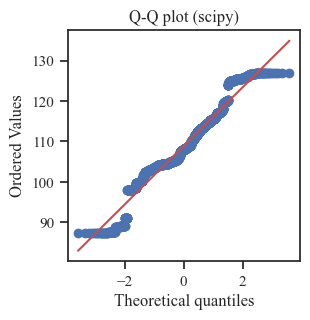

In [11]:
import scipy 
import matplotlib.pyplot as plt 

plt.figure(figsize=(3, 3))
print(pg.normality(metainfo['Longitude']))
scipy.stats.probplot(metainfo['Longitude'], plot= plt)
plt.title("Q-Q plot (scipy)")

>用statsmodels绘制QQ图：

                  W          pval  normal
Longitude  0.955155  4.223229e-33   False


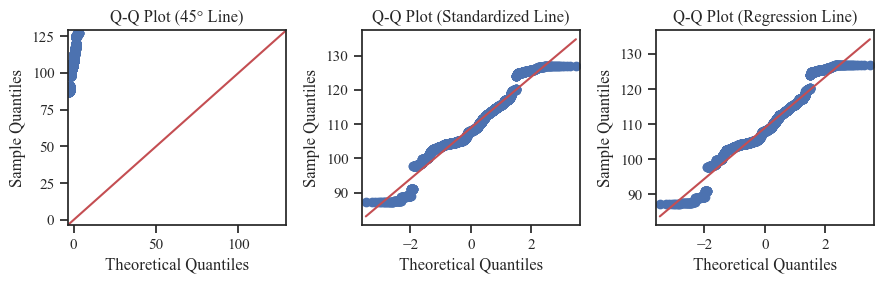

In [12]:
import statsmodels.api as sm 
data = metainfo['Longitude']
print(pg.normality(data))

fig, axs = plt.subplots(1, 3, figsize=  (9, 3))
sm.qqplot(data, line='45', ax=axs[0])
axs[0].set_title("Q-Q Plot (45° Line)")

sm.qqplot(data, line='s', ax=axs[1])
axs[1].set_title("Q-Q Plot (Standardized Line)")

sm.qqplot(data, line='r', ax=axs[2])
axs[2].set_title("Q-Q Plot (Regression Line)")

fig.tight_layout()

>真正的正态分布：

          W      pval  normal
0  0.986338  0.394679    True


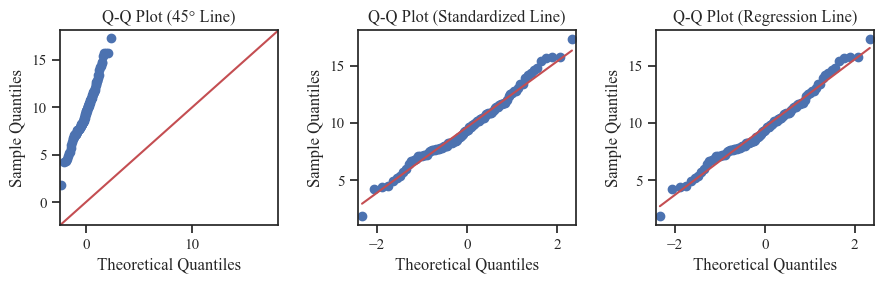

In [13]:
import numpy as np
data = np.random.normal(loc=10, scale=3, size=100)
print(pg.normality(data))

fig, axs = plt.subplots(1, 3, figsize=  (9, 3))
sm.qqplot(data, line='45', ax=axs[0])
axs[0].set_title("Q-Q Plot (45° Line)")

sm.qqplot(data, line='s', ax=axs[1])
axs[1].set_title("Q-Q Plot (Standardized Line)")

sm.qqplot(data, line='r', ax=axs[2])
axs[2].set_title("Q-Q Plot (Regression Line)")

fig.tight_layout()

In [14]:
#@save
def normality_plot(dataframe, name, figsize= (6, 3)):
    fig, ax = plt.subplots(1, 2, figsize= figsize)
    data = metainfo[name]
    print("pg.normality:")
    print(pg.normality(data))
    sns.histplot(metainfo, x= name, ax= ax[0])
    ax[0].set_title(f"Histplot")
    sm.qqplot(data, line= 's', ax= ax[1])
    ax[1].set_title("Q-Q plot (statsmodels)")
    fig.tight_layout()

pg.normality:
                  W          pval  normal
Longitude  0.955155  4.223229e-33   False


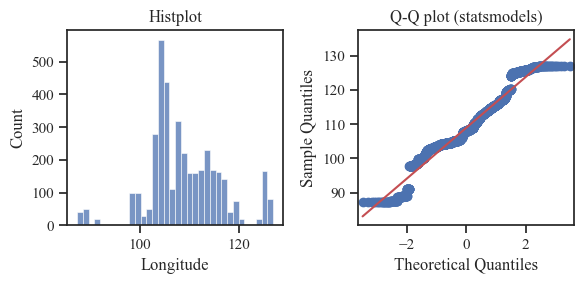

In [15]:
normality_plot(metainfo, 'Longitude')

pg.normality:
                 W          pval  normal
Latitude  0.938651  1.683360e-37   False


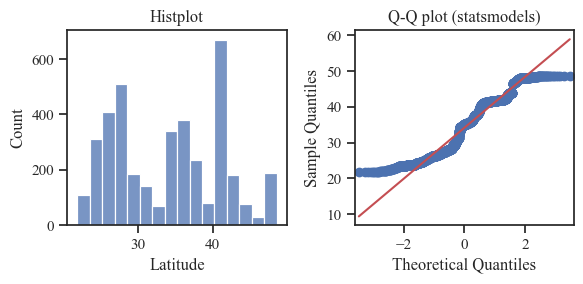

In [16]:
normality_plot(metainfo, "Latitude")

pg.normality:
                 W          pval  normal
Altitude  0.963677  2.646944e-30   False


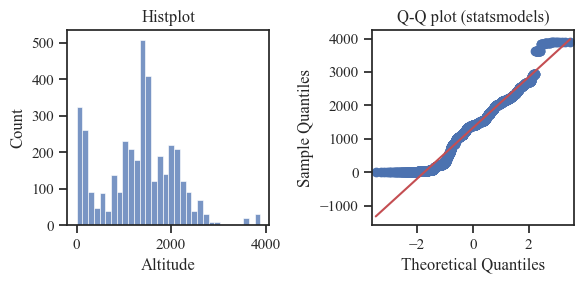

In [17]:
normality_plot(metainfo, "Altitude")

pg.normality:
                  W          pval  normal
Elevation  0.962112  7.471710e-31   False


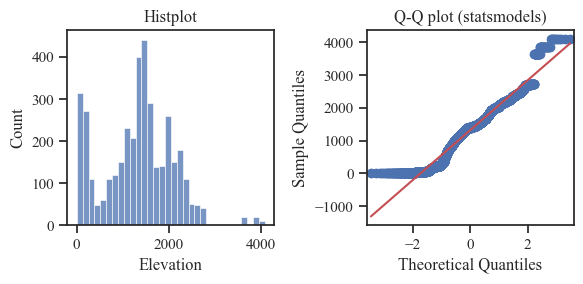

In [18]:
normality_plot(metainfo, 'Elevation')

pg.normality:
                    W          pval  normal
Temperature  0.979315  1.818026e-23   False


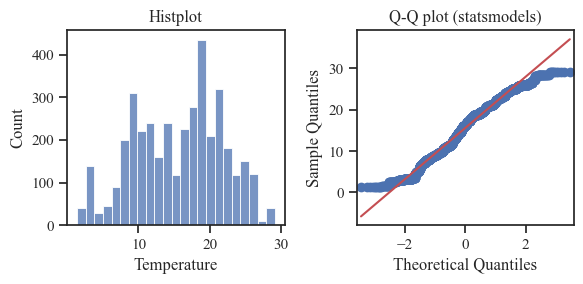

In [19]:
normality_plot(metainfo, 'Temperature')

pg.normality:
                      W          pval  normal
Precipitation  0.530642  4.584507e-73   False


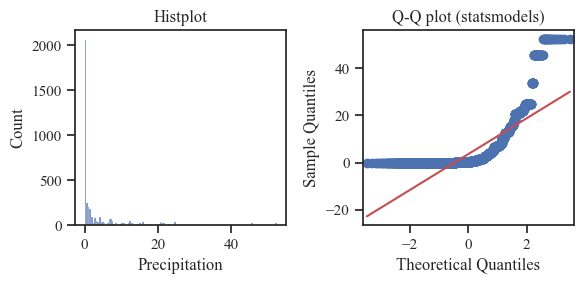

In [20]:
normality_plot(metainfo, 'Precipitation')

pg.normality:
                W          pval  normal
Soil_pH  0.867231  1.449150e-49   False


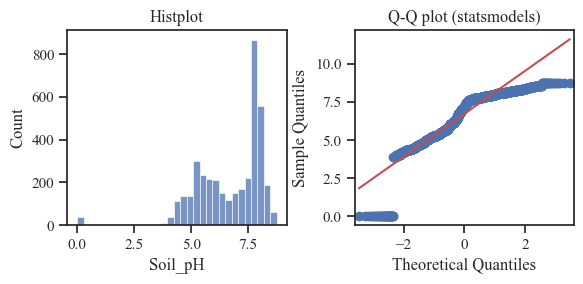

In [21]:
normality_plot(metainfo, "Soil_pH")

# 4. <a id='toc4_'></a>[采样地图](#toc0_)

## 4.1. <a id='toc4_1_'></a>[采样点地图信息](#toc0_)

| 形状    | `marker` 值 |
| ----- | ---------- |
| 圆     | `'o'`      |
| 正方形   | `'s'`      |
| 三角形↑  | `'^'`      |
| 三角形↓  | `'v'`      |
| 菱形    | `'D'`      |
| 星形    | `'*'`      |
| 加号    | `'+'`      |
| x 形   | `'x'`      |
| 点（最小） | `'.'`      |


In [28]:
def scatter(ax, metainfo):
    '''
    # ========== 3. 读取采样点经纬度坐标 ==========
    # samples = pd.read_csv('sampling_points.csv')  # CSV 文件需包含 'lon', 'lat' 两列
    '''
    northern = metainfo[metainfo['Area'] == "Northern Single-cropping"]
    Southwest = metainfo[metainfo['Area'] == "Southwest Winter-Spring"]
    Central = metainfo[metainfo['Area'] == "Central Double-cropping"]
    Southern = metainfo[metainfo['Area'] == "Southern Winter-cropping"]
    colors = ['#38C5EB', '#A0EB38', '#CA38EB', '#EB8F38']
    size = 10
    ax.scatter(northern['Longitude'], northern['Latitude'], color= colors[0], s=size, label='Northern', zorder= 3, marker='x')
    ax.scatter(Southwest['Longitude'], Southwest['Latitude'], color= colors[1], s=size, label='Southwest', zorder= 3, marker='^')
    ax.scatter(Central['Longitude'], Central['Latitude'], color= colors[2], s=size, label='Central', zorder= 3, marker='D')
    ax.scatter(Southern['Longitude'], Southern['Latitude'], color= colors[3], s=size, label='Southern', zorder= 3, marker='+')
    return ax

Text(0.5, 1.0, 'China Elevation Map with Sampling Points')

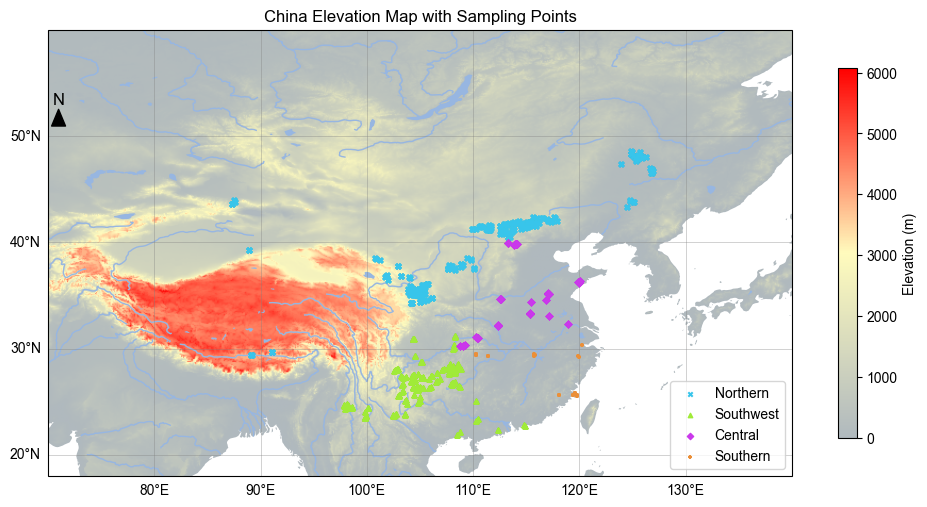

In [29]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.rcParams['svg.fonttype'] = 'none'  # 确保字体类型为 'none'，以避免字体问题
plt.rcParams['font.sans-serif'] = ['Arial']  # 设置默认字体为 Arial Unicode MS
plt.rcParams['font.serif'] = 'Times New Roman'  # 设置衬线字体为 Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 确保负号正常显示


# ========== 1. 读取全球 BIL 格式高程数据（需与 .hdr 同目录） ==========
bil_path = "datas/World_DEM/world_dem"  # 替换为你的 BIL 文件路径
with rasterio.open(bil_path) as src:
    data = src.read(1)  # 读取高程栅格数据（二维数组）
    data = np.where(data == src.nodata, np.nan, data)  # 用 NaN 替换无效值
    bounds = src.bounds   
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]  # 地图范围（用于imshow）

# ========== 2. 定义中国地理范围 ==========
china_extent = [70, 140, 18, 55]  # 西、东、南、北边界

# ========== 4. 绘图（地形图 + 采样点 + 比例尺 + 北箭头） ==========
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection= ccrs.PlateCarree())  # 使用 PlateCarree 投影

# 绘制地形图（颜色渐变，仿照 terrain 风格）
elev_cmap = LinearSegmentedColormap.from_list("elevation", ['#B0B9BE', '#FFFBBD', 'red',])
norm = Normalize(vmin=0, vmax=np.nanmax(data))  # 归一化处理
img = ax.imshow(data, extent=extent, cmap= elev_cmap, norm= norm, origin= 'upper', zorder= 0)

ax.set_extent(china_extent)  # 聚焦中国范围

# 添加国家边界和海岸线
# ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5)
# ax.coastlines(resolution='10m', linewidth=0.5)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
# ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder= 0)
ax.add_feature(cfeature.OCEAN, facecolor='white', zorder= 0)

# 添加经纬网格线
gl = ax.gridlines(draw_labels= True, linewidth= 0.5, color= 'gray', alpha= 0.5)
gl.top_labels = gl.right_labels = False  # 不显示顶部和右侧标签

# 添加采样点（统一蓝色圆点）
# ax.scatter(samples['Longitude'], samples['Latitude'], color= '#0757EC', s=5, label='Sampling points', zorder= 3)
scatter(ax= ax, metainfo= metainfo)

# 添加图例
plt.legend(loc='lower right')

# 添加色带（高程值）
cbar = plt.colorbar(img, ax= ax, shrink= 0.6, orientation= 'vertical', label= 'Elevation (m)')

# 添加简单北箭头
ax.text(71, 53, 'N', fontsize=12, ha='center')
ax.annotate('', xy=(71, 52.5), xytext=(71, 51.5), arrowprops=dict(facecolor='black', width=2, headwidth=10), xycoords='data')

# 添加标题
plt.title("China Elevation Map with Sampling Points")
# plt.tight_layout()

# 保存为 SVG 格式
# plt.savefig("map.svg", format= "svg")

## 4.2. <a id='toc4_2_'></a>[生态信息](#toc0_)

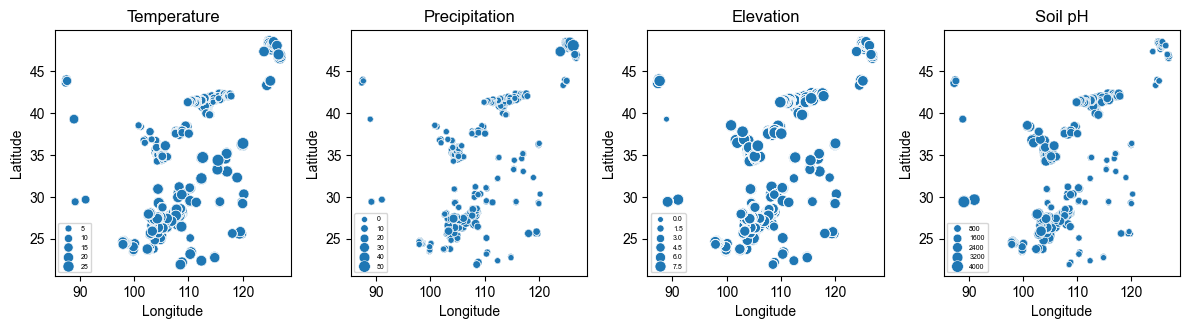

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns 


fontsize = 5
rows, cols = 2, 4
plt.figure(figsize= (12, 6))

plt.subplot(rows, cols, 1)
sns.scatterplot(data= metainfo, x= "Longitude", y= "Latitude", size= "Temperature")
plt.legend(fontsize= fontsize)
plt.title("Temperature")

plt.subplot(rows, cols, 2)
sns.scatterplot(data= metainfo, x= 'Longitude', y= "Latitude", size= "Precipitation")
plt.legend(fontsize= fontsize)
plt.title("Precipitation")

plt.subplot(rows, cols, 3)
sns.scatterplot(data= metainfo, x= 'Longitude', y= "Latitude", size= "Soil_pH")
plt.legend(fontsize= fontsize)
plt.title("Elevation")

plt.subplot(rows, cols, 4)
sns.scatterplot(data= metainfo, x= "Longitude", y= "Latitude", size= "Elevation")
plt.legend(fontsize= fontsize)
plt.title("Soil pH")

plt.tight_layout()

In [ ]:
# 适合正态分布
metainfo[['Longitude', 'Latitude', 'Temperature', 'Precipitation', 'Elevation', 'Soil_pH']].corr("pearson") 

Longitude  Latitude  Temperature  Precipitation  Elevation  \
Longitude       1.000000  0.580115     0.194697       0.213345  -0.586772   
Latitude        0.580115  1.000000    -0.319145       0.054547  -0.104322   
Temperature     0.194697 -0.319145     1.000000       0.257210  -0.496629   
Precipitation   0.213345  0.054547     0.257210       1.000000  -0.099691   
Elevation      -0.586772 -0.104322    -0.496629      -0.099691   1.000000   
Soil_pH         0.055416  0.396920    -0.463501      -0.204769   0.259643   

                Soil_pH  
Longitude      0.055416  
Latitude       0.396920  
Temperature   -0.463501  
Precipitation -0.204769  
Elevation      0.259643  
Soil_pH        1.000000

In [ ]:
# 非参数
metainfo[['Longitude', 'Latitude', 'Temperature', 'Precipitation', 'Elevation', 'Soil_pH']].corr("spearman")

Longitude  Latitude  Temperature  Precipitation  Elevation  \
Longitude       1.000000  0.608089     0.148967      -0.021583  -0.562369   
Latitude        0.608089  1.000000    -0.335411      -0.140366  -0.060186   
Temperature     0.148967 -0.335411     1.000000       0.198672  -0.482819   
Precipitation  -0.021583 -0.140366     0.198672       1.000000   0.012773   
Elevation      -0.562369 -0.060186    -0.482819       0.012773   1.000000   
Soil_pH         0.132883  0.488606    -0.544146      -0.216434   0.274260   

                Soil_pH  
Longitude      0.132883  
Latitude       0.488606  
Temperature   -0.544146  
Precipitation -0.216434  
Elevation      0.274260  
Soil_pH        1.000000

<Axes: >

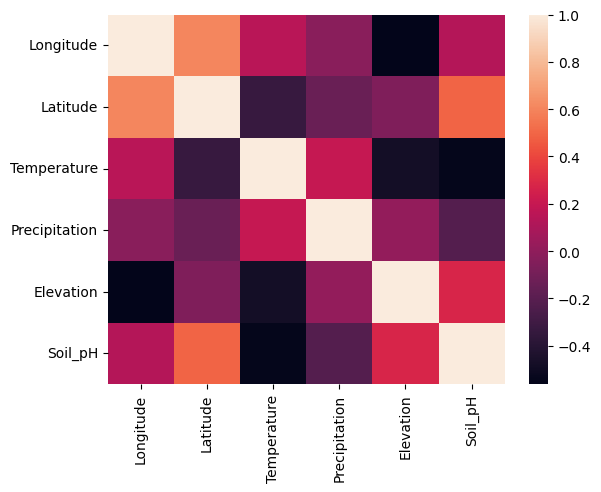

In [ ]:
sns.heatmap(metainfo[['Longitude', 'Latitude', 'Temperature', 'Precipitation', 'Elevation', 'Soil_pH']].corr("spearman"))

>基本符合中国所在地理的规律

# 5. <a id='toc5_'></a>[Diversity analysis](#toc0_)

## 5.1. <a id='toc5_1_'></a>[beta](#toc0_)

### read zOTU table

In [22]:
zotu_rared = pd.read_csv("results/feature_table/zotutab_6k.txt", sep='\t', index_col=0)

In [23]:
zotu_rared.shape 

(165645, 3233)

In [24]:
zotu_rared.head()

F146a  F146b  F146c  F146d  F146e  F147a  F147b  F147c  F147d  \
#OTU ID                                                                    
Zotu34128      0      0      0      0      1      0      0      0      0   
Zotu3         39     31     32     33     46      2      2      3      4   
Zotu155        4      5      1      4      4      1      4      3      6   
Zotu70143      0      0      0      0      0      0      1      0      0   
Zotu178       20     10     18     15     13     18     13     21     16   

           F147e  ...  G99a  G99b  G99c  G99d  G99e  G9a  G9b  G9c  G9d  G9e  
#OTU ID           ...                                                         
Zotu34128      0  ...     0     0     0     0     0    0    0    0    1    0  
Zotu3          1  ...     0     0     0     0     0    1    1    0    0    0  
Zotu155        8  ...     0     0     0     0     0    4    1    4    1    0  
Zotu70143      0  ...     0     0     0     0     0    0    0    0    0    0  
Zotu178       19  ...     2     3     1     2     2    0    0    0    0    0  

[5 rows x 3233 columns]

### get metainfo_beta

In [25]:
metainfo.shape

(3916, 50)

In [26]:
metainfo_beta = metainfo[metainfo['SampleID'].isin(zotu_rared.columns)]

In [27]:
metainfo_beta.shape

(3233, 50)

In [28]:
metainfo_beta.head()

SampleID Group  Code     PartName  Part                 AreaName  Area  \
0      G1a    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
1      G1b    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
2      G1c    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
3      G1d    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
4      G1e    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   

  Loacation     City  Longitude  ...  Disease  早疫病  晚疫病  疮痂病  黑痣病 粉痂病  青枯病  \
0    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
1    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
2    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
3    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
4    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   

  黑胫病 枯萎病 病毒病  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 50 columns]

### Calc distance

In [29]:
from skbio.diversity import beta_diversity 


# data
data = zotu_rared.T.values
ids = zotu_rared.columns

if False:
    # 计算braycurtis距离, jaccard
    bray_dm = beta_diversity(metric='braycurtis', counts=data, ids=ids)

    # 保存为矩阵格式
    df_bray = pd.DataFrame(bray_dm.data, index=ids, columns=ids)
    df_bray.to_csv('results/diversity/beta/6k/skbio_bray_curtis.txt', sep='\t')
    print(df_bray)

In [30]:
distance = pd.read_csv("results/diversity/beta/6k/bray_curtis.txt", index_col= 0, sep='\t')

In [31]:
distance.shape

(3233, 3233)

In [32]:
distance.head()

F146a  F146b  F146c  F146d  F146e  F147a  F147b  F147c  F147d  \
bray_curtis                                                                  
F146a        0.000  0.479  0.470  0.487  0.476  0.614  0.608  0.609  0.608   
F146b        0.479  0.000  0.483  0.492  0.498  0.617  0.609  0.622  0.614   
F146c        0.470  0.483  0.000  0.479  0.470  0.608  0.600  0.602  0.604   
F146d        0.487  0.492  0.479  0.000  0.489  0.614  0.608  0.620  0.610   
F146e        0.476  0.498  0.470  0.489  0.000  0.619  0.611  0.612  0.611   

             F147e  ...   G99a   G99b   G99c   G99d   G99e    G9a    G9b  \
bray_curtis         ...                                                    
F146a        0.608  ...  0.864  0.871  0.883  0.871  0.870  0.876  0.879   
F146b        0.621  ...  0.859  0.868  0.880  0.864  0.866  0.875  0.877   
F146c        0.601  ...  0.868  0.875  0.891  0.876  0.879  0.881  0.886   
F146d        0.617  ...  0.862  0.865  0.884  0.868  0.868  0.876  0.878   
F146e        0.613  ...  0.867  0.876  0.889  0.877  0.872  0.878  0.880   

               G9c    G9d    G9e  
bray_curtis                       
F146a        0.885  0.883  0.886  
F146b        0.879  0.880  0.881  
F146c        0.888  0.886  0.887  
F146d        0.884  0.879  0.886  
F146e        0.886  0.882  0.884  

[5 rows x 3233 columns]

是 scikit-bio 在内部处理 DistanceMatrix 和 grouping 时出现的问题，根本原因几乎总是：你手动从 .txt 加载的距离矩阵用的是 非连续内存的 numpy array。这在 PERMANOVA 的底层 Cython 实现里是不被允许的。当你用 DistanceMatrix(df.values, ids=sample_ids) 创建对象时，df.values 可能是 不连续的内存块。只需加一句 .copy() 强制转换为连续内存即可。

>用usearch计算的距离需要包装一下：

In [111]:
from skbio import DistanceMatrix 


# 将 pandas 矩阵包装为 scikit-bio 的 DistanceMatrix
# dm = DistanceMatrix(df.values, ids=sample_ids)
dm = DistanceMatrix(distance.values.copy(), ids= distance.index)

### Heat map

- 🔥 热图（heatmap）：观察样本间的整体相似/差异关系。

<Axes: ylabel='bray_curtis'>

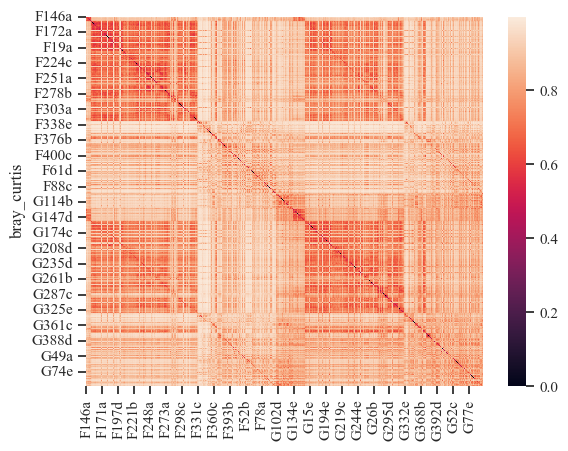

In [39]:
sns.heatmap(data=distance)

### Cluster tree

- 🌳 聚类树（dendrogram）：通过 UPGMA 或 NJ 方法展示样本聚类结构。

/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=s

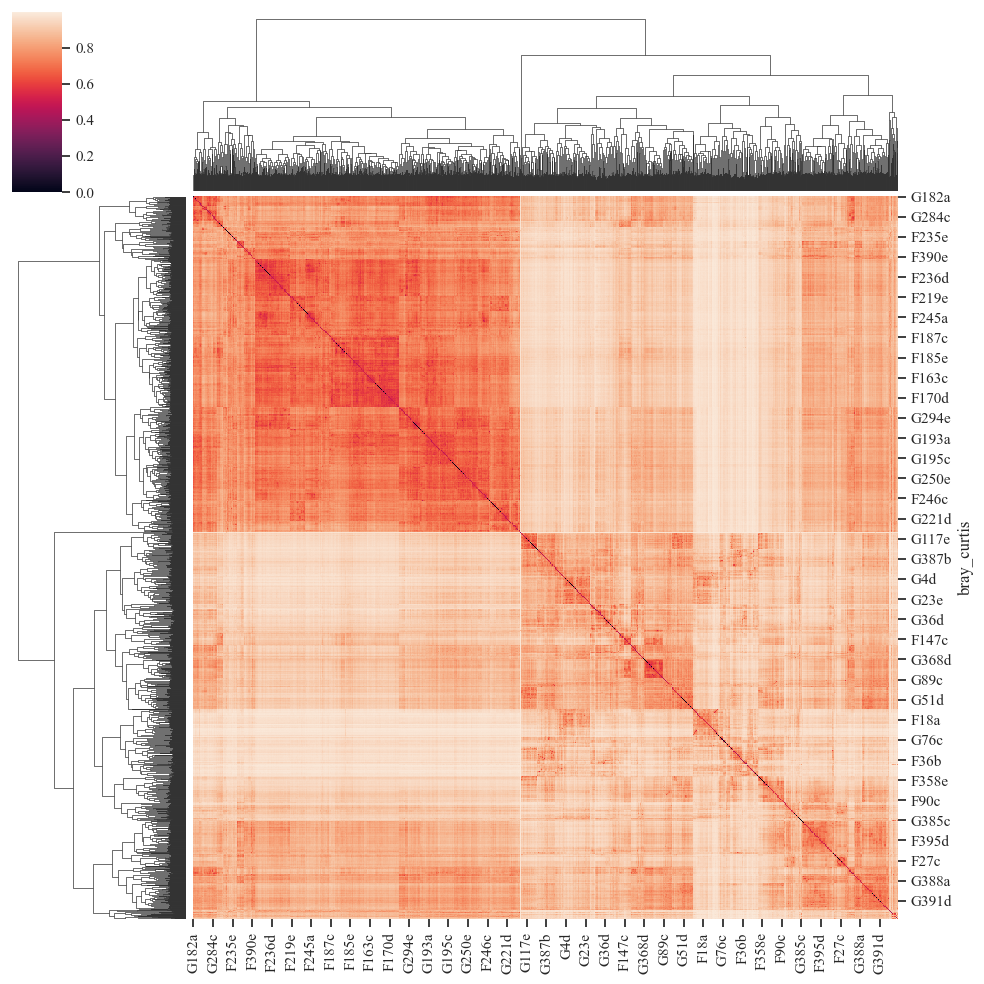

In [40]:
sns.clustermap(data=distance)

### PcoA

- 📈 主坐标分析（PCoA）：可视化样本之间的差异空间（2D/3D）。

Text(0.5, 0.92, 'PCoA based on Bray-Curtis distances')

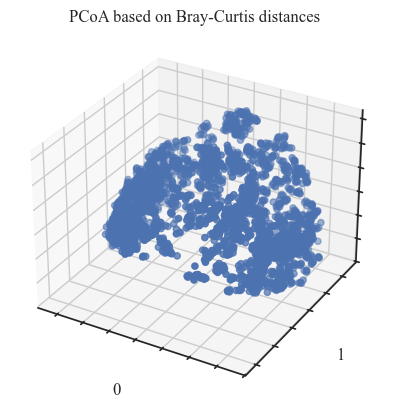

In [41]:
from skbio.stats.ordination import pcoa 


# 使用 Bray-Curtis 距离矩阵进行 PCoA
ordination = pcoa(dm)
ordination.plot()
plt.title("PCoA based on Bray-Curtis distances")

In [42]:
ordination.proportion_explained.head()

PC1    0.133251
PC2    0.044788
PC3    0.034327
PC4    0.025590
PC5    0.019830
dtype: float64

In [43]:
ordination.samples.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
F146a  0.101427  0.030786  0.188889 -0.210476  0.229100  0.061938  0.002985   
F146b  0.108239  0.020589  0.182695 -0.212907  0.235250  0.056470  0.008709   
F146c  0.103103  0.043010  0.177873 -0.221611  0.237369  0.059436  0.014819   
F146d  0.102334  0.025469  0.175328 -0.219025  0.233836  0.057954  0.006398   
F146e  0.088894  0.027278  0.178963 -0.212539  0.234750  0.059016 -0.000558   

            PC8       PC9      PC10  ...  PC3224  PC3225  PC3226  PC3227  \
F146a -0.028070  0.116945 -0.097836  ...     0.0     0.0     0.0     0.0   
F146b -0.032818  0.108781 -0.096974  ...     0.0     0.0     0.0     0.0   
F146c -0.028437  0.110075 -0.095739  ...     0.0     0.0     0.0     0.0   
F146d -0.035616  0.111995 -0.101585  ...     0.0     0.0     0.0     0.0   
F146e -0.008291  0.110428 -0.097674  ...     0.0     0.0     0.0     0.0   

       PC3228  PC3229  PC3230  PC3231  PC3232  PC3233  
F146a     0.0     0.0     0.0     0.0     0.0     0.0  
F146b     0.0     0.0     0.0     0.0     0.0     0.0  
F146c     0.0     0.0     0.0     0.0     0.0     0.0  
F146d     0.0     0.0     0.0     0.0     0.0     0.0  
F146e     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 3233 columns]

In [65]:
ordination_df.loc[:, ['PC1', 'PC2', 'SampleID']]

PC1       PC2 SampleID
F146a  0.101427  0.030786    F146a
F146b  0.108239  0.020589    F146b
F146c  0.103103  0.043010    F146c
F146d  0.102334  0.025469    F146d
F146e  0.088894  0.027278    F146e
...         ...       ...      ...
G9a    0.164442 -0.122614      G9a
G9b    0.169669 -0.130275      G9b
G9c    0.161565 -0.114533      G9c
G9d    0.172217 -0.124049      G9d
G9e    0.178521 -0.129650      G9e

[3233 rows x 3 columns]

In [77]:
ordination_df = ordination.samples.copy()
ordination_df['SampleID'] = ordination_df.index
metainfo_ordination = pd.merge(metainfo_beta, ordination_df.loc[:, ['PC1', 'PC2', 'SampleID']], on='SampleID')
metainfo_ordination.shape

(3233, 52)

/tmp/ipykernel_2835072/4156570989.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PC1 ({ordination.proportion_explained[0]*100:.2f}%)")
/tmp/ipykernel_2835072/4156570989.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PC2 ({ordination.proportion_explained[1]*100:.2f}%)")


Text(0, 0.5, 'PC2 (4.48%)')

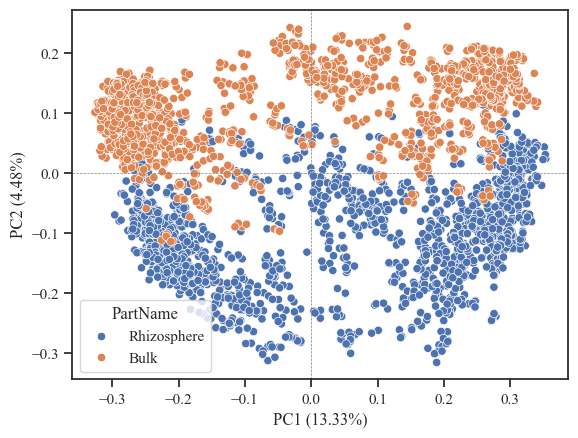

In [102]:
sns.scatterplot(data=metainfo_ordination, x='PC1', y='PC2', hue='PartName')
# sns.scatterplot(data=metainfo_ordination, x='PC1', y='PC2', hue='AreaName')
# sns.scatterplot(data=metainfo_ordination, x='PC1', y='PC2', hue='Soil')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({ordination.proportion_explained[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({ordination.proportion_explained[1]*100:.2f}%)")
# plt.tight_layout()

In [87]:
metainfo_ordination.set_index('SampleID')['PartName']

SampleID
G1a      Rhizosphere
G1b      Rhizosphere
G1c      Rhizosphere
G1d      Rhizosphere
G1e      Rhizosphere
            ...     
F403e           Bulk
F404b           Bulk
F404c           Bulk
F404d           Bulk
F404e           Bulk
Name: PartName, Length: 3233, dtype: object

In [107]:
metainfo_ordination.set_index('SampleID')['PartName']

SampleID
G1a      Rhizosphere
G1b      Rhizosphere
G1c      Rhizosphere
G1d      Rhizosphere
G1e      Rhizosphere
            ...     
F403e           Bulk
F404b           Bulk
F404c           Bulk
F404d           Bulk
F404e           Bulk
Name: PartName, Length: 3233, dtype: object

### permanova

In [112]:
from skbio.stats.distance import permanova 


adonis_results = permanova(distance_matrix=dm, grouping=metainfo_ordination.set_index('SampleID')['PartName'])
print(adonis_results)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                    3233
number of groups                  2
test statistic             122.1354
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


In [ ]:
permanova(distance_matrix=dm, grouping=metainfo_ordination.set_index('SampleID')['AreaName'])

3233

In [ ]:
#@save
import itertools 
from statsmodels.stats.multitest import multipletests


metadata = metainfo_ordination.set_index('SampleID')

# 准备工作
group_column = 'Group'
unique_groups = metadata[group_column].unique()
pairwise_results = []

# 两两组别组合
for group1, group2 in itertools.combinations(unique_groups, 2):
    # 选出这两个组的样本
    sample_mask = metadata[group_column].isin([group1, group2])
    selected_ids = metadata[sample_mask].index.tolist()

    # 构造子矩阵
    sub_dm = dm.filter(selected_ids)
    sub_grouping = metadata.loc[selected_ids, group_column]

    # 执行 PERMANOVA
    result = permanova(distance_matrix=sub_dm, grouping=sub_grouping)
    pairwise_results.append({
        'Group1': group1,
        'Group2': group2,
        'p-value': result['p-value'],
        'F-stat': result['test statistic'],
        'df': result['sample size']
    })

# 整理成 DataFrame
pairwise_df = pd.DataFrame(pairwise_results)

# 多重检验校正（FDR）
pairwise_df['q-value'] = multipletests(pairwise_df['p-value'], method='fdr_bh')[1]

# 打印结果
print(pairwise_df[['Group1', 'Group2', 'F-stat', 'p-value', 'q-value']])

## 5.2. <a id='toc5_2_'></a>[alpha](#toc0_)

### 5.2.1. <a id='toc5_2_1_'></a>[read alpha txt](#toc0_)

In [102]:
# alphas = pd.read_table("results/diversity/alpha/zotutab_raw_alpha.txt")
# alphas.shape

In [103]:
# alphas = pd.read_table("results/diversity/alpha/zotutab_5k_alpha.txt")
# alphas.shape

In [104]:
# alphas = pd.read_table("results/diversity/alpha/zotutab_6k_alpha.txt")
# alphas.shape

In [105]:
# alphas = pd.read_table("results/diversity/alpha/zotutab_10k_alpha.txt")
# alphas.shape

In [106]:
# alphas = pd.read_table("results/diversity/alpha/zotutab_15k_alpha.txt")
# alphas.shape

In [107]:
alphas = pd.read_table("results/diversity/alpha/zotutab_20k_alpha.txt")
alphas.shape

(2401, 23)

In [108]:
alphas.rename(columns= {"Sample": "SampleID"}, inplace= True)
alphas.shape

(2401, 23)

In [109]:
alphas.head(5)

SampleID  berger_parker  buzas_gibson    chao1  dominance  equitability  \
0    F146a         0.0159         0.104  10414.3      0.998         0.885   
1    F146b         0.0154         0.111  10328.6      0.998         0.891   
2    F146c         0.0170         0.109  10958.1      0.998         0.886   
3    F146d         0.0148         0.114   9837.9      0.998         0.893   
4    F146e         0.0181         0.105  10433.0      0.998         0.885   

     jost   jost1    reads  richness  ...  shannon_e  shannon_2  shannon_10  \
0  1034.7  2071.3  20000.0    5609.0  ...       7.64       11.0        3.32   
1  1166.1  2223.9  20000.0    5716.0  ...       7.71       11.1        3.35   
2  1083.8  2174.5  20000.0    5842.0  ...       7.68       11.1        3.34   
3  1187.3  2272.5  20000.0    5730.0  ...       7.73       11.2        3.36   
4  1038.0  2106.4  20000.0    5717.0  ...       7.65       11.0        3.32   

   flyvbjerg  mirror  mirrorns  logfit  logfitns  logfitmu  logfitmuns  
0     5187.3  8135.0    3631.0  4490.0    5023.0      -0.2        -0.9  
1     4978.6  8345.0    3717.0  4495.0    5411.0      -0.2        -0.8  
2     5380.1  8400.0    3600.0  4783.0    5350.0      -0.2        -0.9  
3     5349.6  8462.0    3851.0  5255.0    5620.0      -0.8        -0.7  
4     5182.6  8296.0    3633.0  4570.0    5501.0      -0.2        -0.8  

[5 rows x 23 columns]

In [110]:
alphas.columns

Index(['SampleID', 'berger_parker', 'buzas_gibson', 'chao1', 'dominance',
       'equitability', 'jost', 'jost1', 'reads', 'richness', 'richness2',
       'robbins', 'simpson', 'shannon_e', 'shannon_2', 'shannon_10',
       'flyvbjerg', 'mirror', 'mirrorns', 'logfit', 'logfitns', 'logfitmu',
       'logfitmuns'],
      dtype='object')

In [111]:
metainfo.shape

(3916, 50)

In [112]:
metainfo.head()

SampleID Group  Code     PartName  Part                 AreaName  Area  \
0      G1a    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
1      G1b    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
2      G1c    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
3      G1d    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
4      G1e    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   

  Loacation     City  Longitude  ...  Disease  早疫病  晚疫病  疮痂病  黑痣病 粉痂病  青枯病  \
0    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
1    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
2    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
3    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   
4    Yunnan  Lincang  99.805835  ...      早疫病    3    0    0    0   0    0   

  黑胫病 枯萎病 病毒病  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 50 columns]

### 5.2.2. <a id='toc5_2_2_'></a>[merge metainfo and alpha](#toc0_)

In [113]:
# Screening matainfo accordding to alphas (efficient smaples)
metainfo_diversity = metainfo[metainfo['SampleID'].isin(alphas["SampleID"])]

In [114]:
metainfo_diversity.shape

(2401, 50)

In [115]:
metainfo_diversity = pd.merge(left= metainfo_diversity, right= alphas, on= "SampleID")

In [116]:
metainfo_diversity.head(5)

SampleID Group  Code     PartName  Part                 AreaName  Area  \
0      G1a    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
1      G1c    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
2      G1d    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
3      G1e    G1     1  Rhizosphere     1  Southwest Winter-Spring     2   
4      G2c    G2     2  Rhizosphere     1  Southwest Winter-Spring     2   

  Loacation     City  Longitude  ...  shannon_e  shannon_2  shannon_10  \
0    Yunnan  Lincang  99.805835  ...       7.51       10.8        3.26   
1    Yunnan  Lincang  99.805835  ...       7.51       10.8        3.26   
2    Yunnan  Lincang  99.805835  ...       7.55       10.9        3.28   
3    Yunnan  Lincang  99.805835  ...       7.53       10.9        3.27   
4    Yunnan  Lincang  99.805835  ...       7.38       10.7        3.21   

   flyvbjerg  mirror mirrorns  logfit logfitns logfitmu logfitmuns  
0     4618.1  8141.0   3167.0  5482.0   5482.0     -1.0       -1.0  
1     5118.8  8160.0   3236.0  5314.0   5314.0     -1.0       -1.0  
2     5557.2  8285.0   3295.0  5370.0   5370.0     -1.0       -1.0  
3     5490.4  8272.0   3335.0  4973.0   5563.0     -0.2       -0.9  
4     5392.6  7873.0   3226.0  4735.0   5296.0     -0.2       -0.9  

[5 rows x 72 columns]

In [117]:
# metainfo_diversity[["SampleID", "Group", "Part", "Area", "Longitude", "Latitude", "Altitude", "richness"]].groupby("Group").mean(numeric_only=True)

# mean所有的技术重复 (a, b, ...)
metainfo_diversity = metainfo_diversity.groupby("Group").agg(lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else x.unique()[0]).reset_index()

In [118]:
metainfo_diversity.shape

(676, 72)

In [119]:
metainfo_diversity.head()

Group SampleID   Code PartName  Part                  AreaName  Area  \
0    F1      F1a    1.0     Bulk   2.0   Southwest Winter-Spring   2.0   
1   F14     F14a   14.0     Bulk   2.0   Southwest Winter-Spring   2.0   
2  F146    F146a  146.0     Bulk   2.0  Northern Single-cropping   1.0   
3  F147    F147c  147.0     Bulk   2.0  Northern Single-cropping   1.0   
4  F148    F148c  148.0     Bulk   2.0  Northern Single-cropping   1.0   

      Loacation     City   Longitude  ...  shannon_e  shannon_2  shannon_10  \
0        Yunnan  Lincang   99.805835  ...   8.232000  11.880000    3.578000   
1        Yunnan   Dehong   98.276002  ...   7.947500  11.475000    3.452500   
2  Heilongjiang  Qiqihar  125.678082  ...   7.682000  11.080000    3.338000   
3  Heilongjiang  Qiqihar  126.303351  ...   7.536667  10.866667    3.273333   
4  Heilongjiang   Suihua  126.734268  ...   7.453333  10.733333    3.236667   

     flyvbjerg        mirror     mirrorns       logfit     logfitns logfitmu  \
0  6872.080000  10603.200000  4323.800000  6454.000000  7045.400000    -0.32   
1  6762.325000   9576.000000  4029.000000  5456.500000  6446.000000    -0.20   
2  5215.640000   8327.600000  3686.400000  4718.600000  5381.000000    -0.32   
3  5142.400000   8083.666667  3589.666667  4434.000000  5211.333333    -0.20   
4  5405.633333   7935.333333  3508.666667  4594.333333  5065.000000    -0.40   

  logfitmuns  
0  -0.880000  
1  -0.825000  
2  -0.820000  
3  -0.833333  
4  -0.833333  

[5 rows x 72 columns]

>合并所有技术重复 (平均) 后的结果。

## 5.3. <a id='toc5_3_'></a>[check](#toc0_)

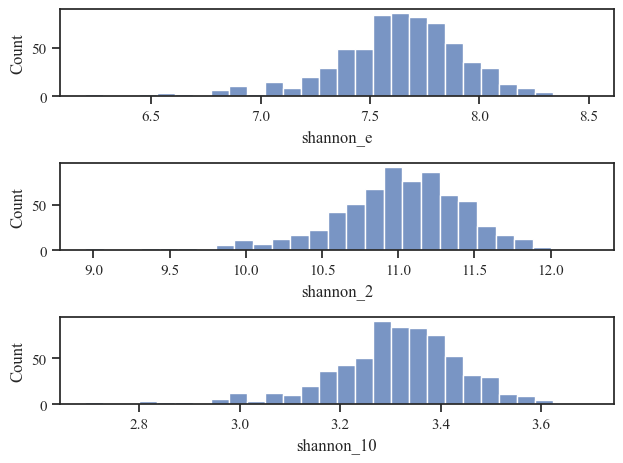

In [265]:
plt.subplot(3,1,1)
sns.histplot(data= metainfo_diversity['shannon_e'])
plt.subplot(3,1,2)
sns.histplot(data= metainfo_diversity['shannon_2'])
plt.subplot(3,1,3)
sns.histplot(data= metainfo_diversity['shannon_10'])
plt.tight_layout()

In [122]:
metainfo_diversity[['Part', 'Area', 'Longitude', 'Latitude', 'Elevation', 'Temperature', 'Precipitation', 'Soil_pH', 'richness', 'chao1', 'shannon_e']].corr("pearson")

Part      Area  Longitude  Latitude  Elevation  \
Part           1.000000  0.029087   0.001980 -0.002380  -0.015496   
Area           0.029087  1.000000   0.078083 -0.586700  -0.500863   
Longitude      0.001980  0.078083   1.000000  0.541856  -0.581408   
Latitude      -0.002380 -0.586700   0.541856  1.000000   0.005594   
Elevation     -0.015496 -0.500863  -0.581408  0.005594   1.000000   
Temperature   -0.068612  0.568592   0.186311 -0.392731  -0.546943   
Precipitation -0.076466 -0.030987   0.202364  0.048063  -0.109040   
Soil_pH        0.047803 -0.519294  -0.007964  0.527568   0.331065   
richness       0.235797  0.031925  -0.057454 -0.096771   0.043986   
chao1          0.135749  0.036858  -0.023957 -0.067605   0.025005   
shannon_e      0.210055  0.037767  -0.056573 -0.105190   0.044236   

               Temperature  Precipitation   Soil_pH  richness     chao1  \
Part             -0.068612      -0.076466  0.047803  0.235797  0.135749   
Area              0.568592      -0.030987 -0.519294  0.031925  0.036858   
Longitude         0.186311       0.202364 -0.007964 -0.057454 -0.023957   
Latitude         -0.392731       0.048063  0.527568 -0.096771 -0.067605   
Elevation        -0.546943      -0.109040  0.331065  0.043986  0.025005   
Temperature       1.000000       0.230183 -0.562891  0.042266  0.008204   
Precipitation     0.230183       1.000000 -0.221980 -0.077792 -0.088413   
Soil_pH          -0.562891      -0.221980  1.000000  0.155713  0.181156   
richness          0.042266      -0.077792  0.155713  1.000000  0.944646   
chao1             0.008204      -0.088413  0.181156  0.944646  1.000000   
shannon_e         0.087789      -0.026282  0.059948  0.931456  0.814503   

               shannon_e  
Part            0.210055  
Area            0.037767  
Longitude      -0.056573  
Latitude       -0.105190  
Elevation       0.044236  
Temperature     0.087789  
Precipitation  -0.026282  
Soil_pH         0.059948  
richness        0.931456  
chao1           0.814503  
shannon_e       1.000000

<Axes: >

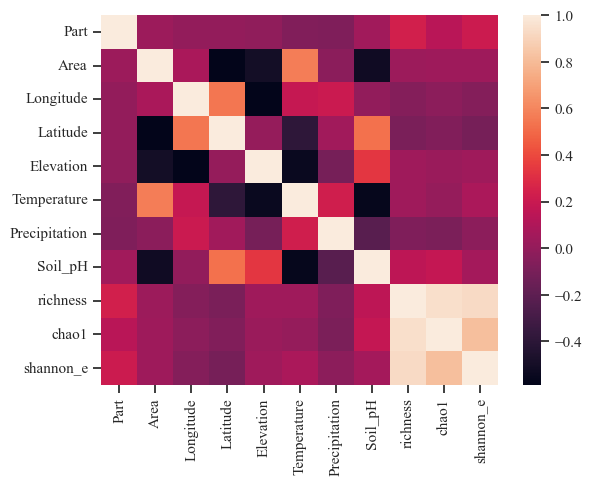

In [266]:
sns.heatmap(metainfo_diversity[['Part', 'Area', 'Longitude', 'Latitude', 'Elevation', 'Temperature', 'Precipitation', 'Soil_pH', 'richness', 'chao1', 'shannon_e']].corr("pearson"))

### 5.3.1. <a id='toc5_3_1_'></a>[线性回归](#toc0_)

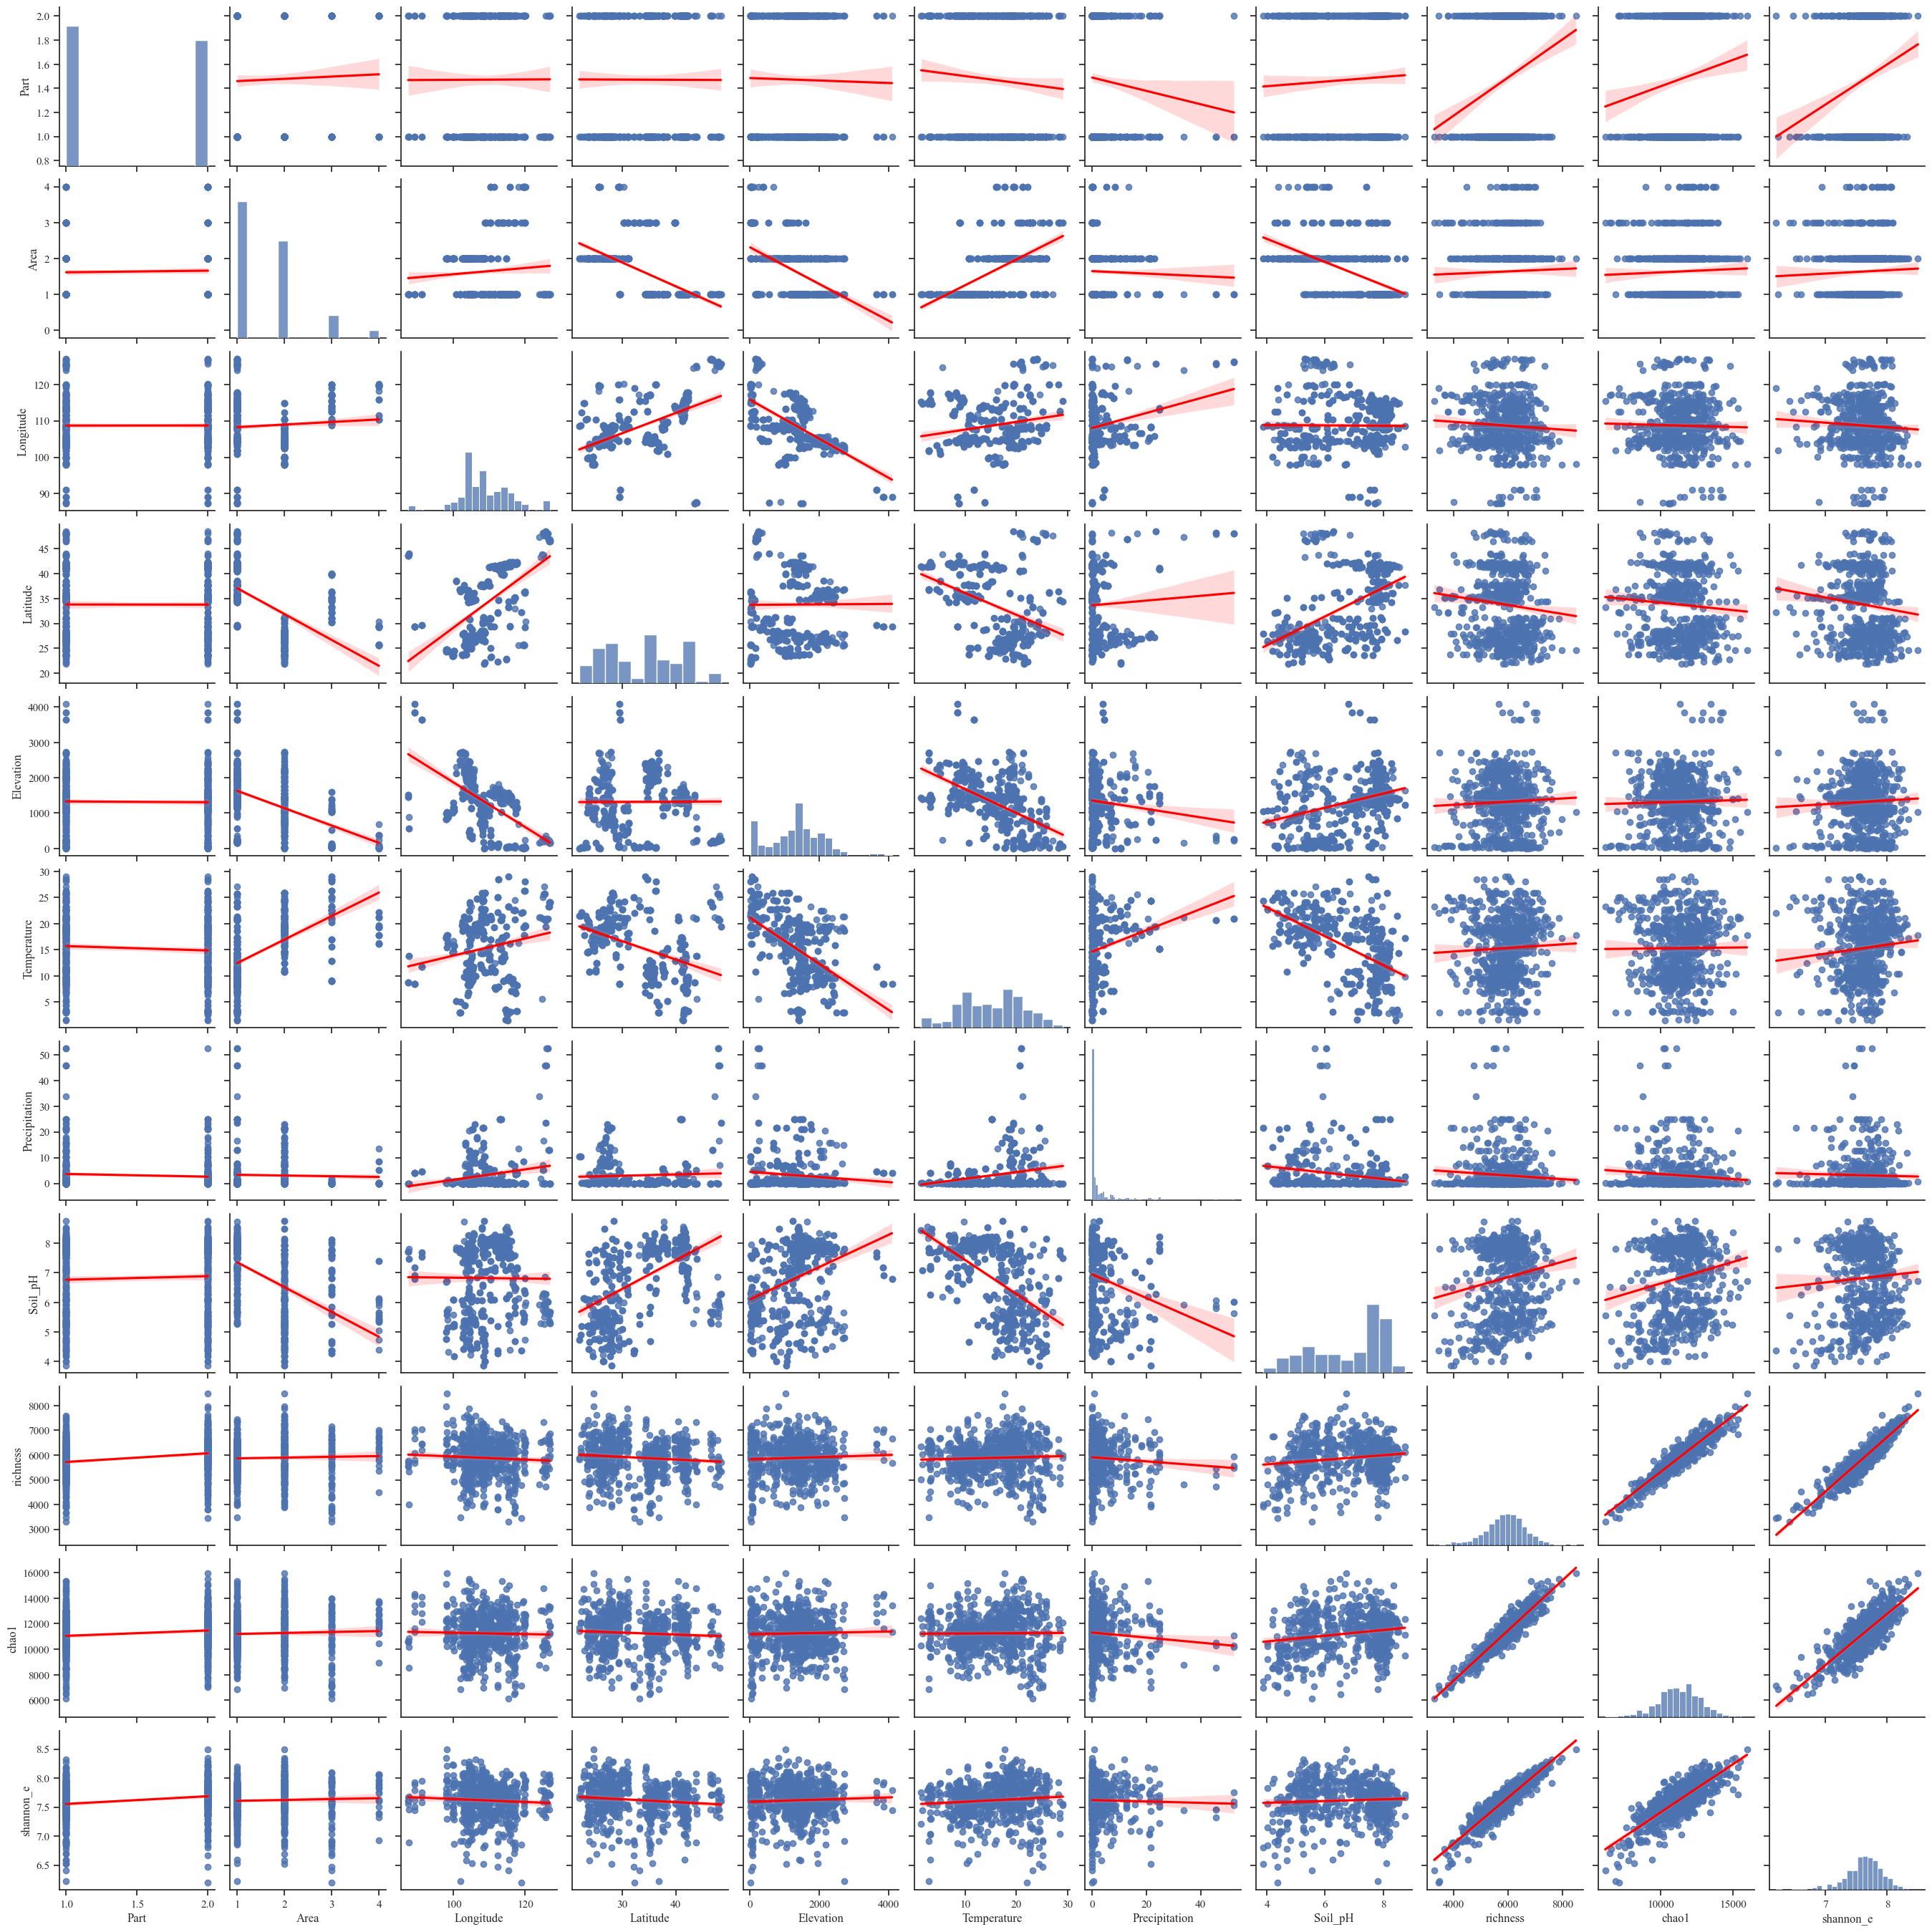

In [267]:
sns.pairplot(
    data= metainfo_diversity, 
    # vars= ["Longitude", "Latitude", "Soil_pH", "Temperature", "Precipitation", "Elevation", "richness", "shannon_e"],
    vars= ['Part', 'Area', 'Longitude', 'Latitude', 'Elevation', 'Temperature', 'Precipitation', 'Soil_pH', 'richness', 'chao1', 'shannon_e'],
    kind= "reg",
    plot_kws= {"line_kws": {"color": "red"}},
    # hue= "Part"
)

>很少有之间spearman的强相关关系；

>线性回归效果一般。

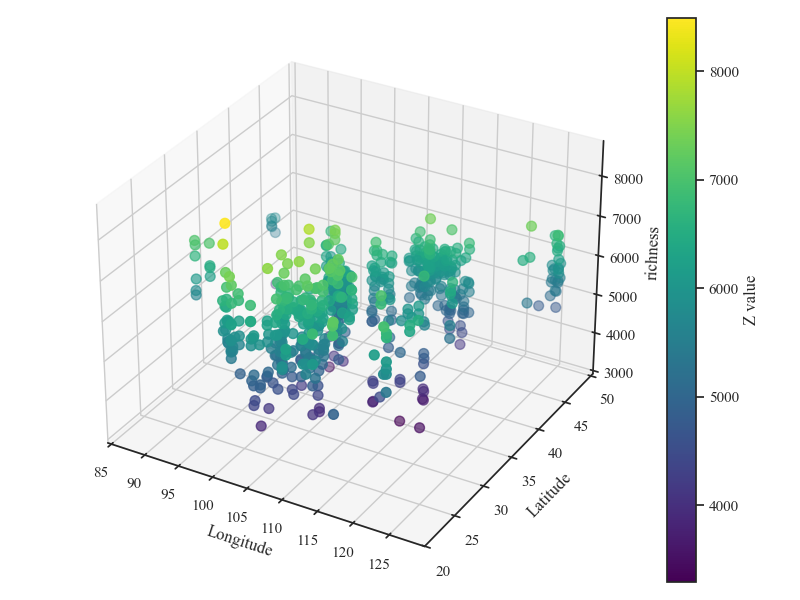

In [367]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 创建画布
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# 绘制3D散点图
scatter = ax.scatter(metainfo_diversity['Longitude'], metainfo_diversity['Latitude'], metainfo_diversity['richness'], c=metainfo_diversity['richness'], cmap='viridis', s=50)
# scatter = ax.scatter(metainfo_diversity['Longitude'], metainfo_diversity['Latitude'], metainfo_diversity['richness'], c=metainfo_diversity['Part'].astype('category').cat.codes, cmap='viridis', s=metainfo_diversity['richness']/1000)
# 添加坐标轴标签
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('richness')
# 添加颜色条
fig.colorbar(scatter, ax=ax, label='Z value')
fig.tight_layout()
# fig.show()

In [371]:
%matplotlib widget
demo_ax = plt.axes(projection= "3d")
demo_ax.scatter3D(metainfo_diversity['Longitude'], metainfo_diversity['Latitude'], metainfo_diversity['richness'], c=metainfo_diversity['richness'], cmap='viridis', s=50)

### 5.3.2. <a id='toc5_3_2_'></a>[多项式回归](#toc0_)

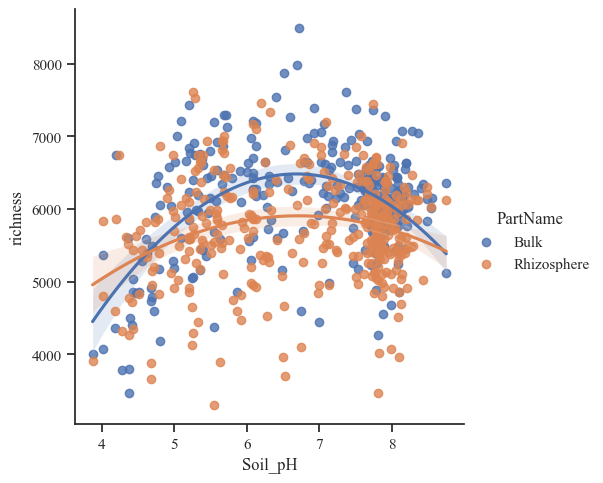

In [271]:
sns.lmplot(data=metainfo_diversity, x='Soil_pH', y='richness', order= 2, hue="PartName")

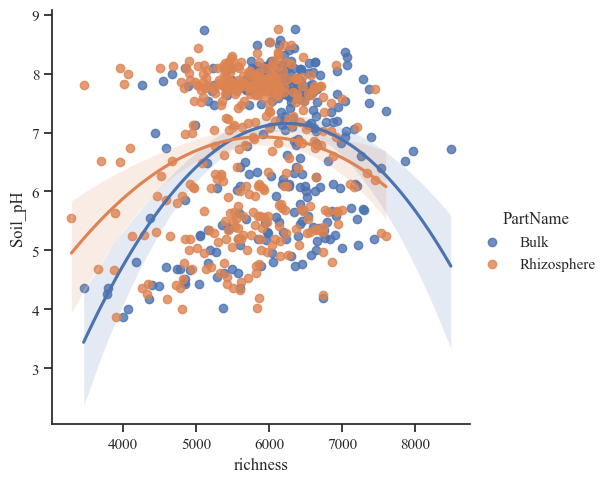

In [275]:
sns.lmplot(data=metainfo_diversity, y='Soil_pH', x='richness', order= 2, hue="PartName")

利用多项式进行回归：

In [168]:
from sklearn.preprocessing import PolynomialFeatures 


# DatasDatas
X = metainfo_diversity[['Part', 'Area', 'Longitude', 'Latitude', 'Elevation', 'Temperature', 'Precipitation', 'Soil_pH']] 
# X = metainfo_diversity[['Part', 'Longitude', 'Latitude', 'Elevation', 'Temperature', 'Precipitation', 'Soil_pH']] 
# X = metainfo_diversity[['Longitude', 'Latitude', 'Elevation', 'Temperature', 'Precipitation', "Soil_pH"]] 
# X = metainfo_diversity[['Longitude', 'Latitude']] 
# X = metainfo_diversity[['Elevation', "Soil_pH"]] 
y = metainfo_diversity['richness']

# 多项式回归
poly = PolynomialFeatures(degree= 4, include_bias=True)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
print("R2 with polynomial terms:", r2_score(y, model.predict(X_poly)))

R2 with polynomial terms: 0.7583095122908833


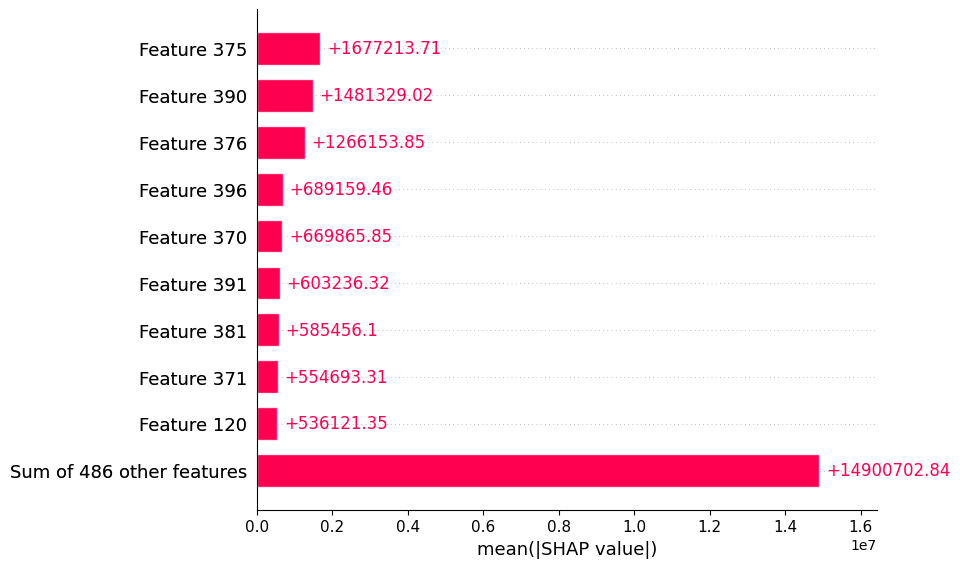

In [193]:
import shap 

explainer = shap.Explainer(model, X_poly)
shap_values = explainer(X_poly)
# 全局特征重要性可视化
shap.plots.bar(shap_values)

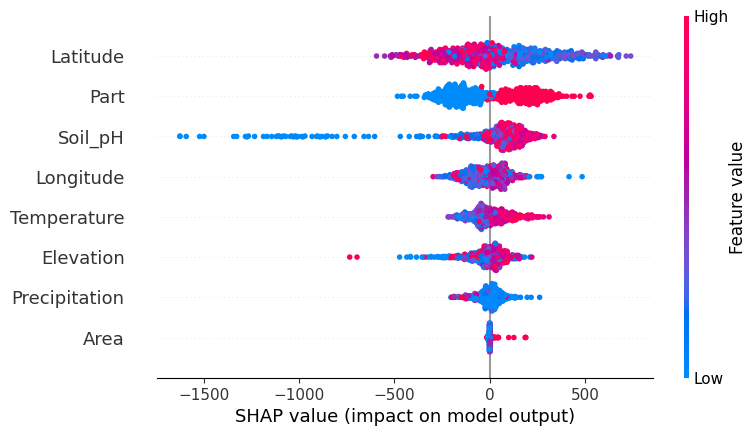

In [192]:
shap.plots.beeswarm(shap_values)

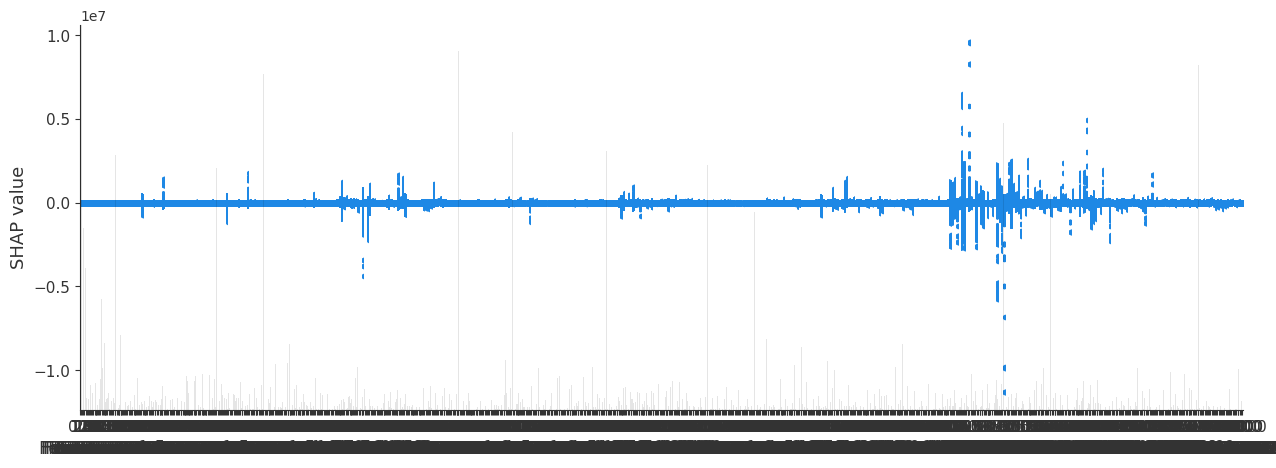

In [194]:
shap.plots.scatter(shap_values)

### 5.3.3. <a id='toc5_3_3_'></a>[核回归](#toc0_)

虽然 statsmodels.KernelReg 目前默认使用 Gaussian kernel，不支持更换核函数类型，但你可以通过控制 带宽 来模拟不同核函数的“宽窄”特性。如果你需要更多控制（例如更换核函数种类，如 Epanechnikov、Tri-cube 等），可以考虑 sklearn.neighbors.KernelDensity 或 pygam 包。



🔍 参数解释：
- var_type='c'：变量类型（'c' = continuous, 'o' = ordered, 'u' = unordered）。
- 返回值 fit() 中：
  - y_pred 是预测值；
  - y_std 是估计的不确定性（近似标准差）。

In [326]:
from statsmodels.nonparametric.kernel_regression import KernelReg


# 变量
X = metainfo_diversity[['Latitude', 'Longitude']]
y = metainfo_diversity['richness']

# 拟合核回归模型，两个自变量都是连续的
kr = KernelReg(endog=y, exog=X, var_type='cc')  # 两个连续变量

# 对所有点进行预测（回归）
y_pred, y_std = kr.fit(X)

Text(0.5, 0.92, 'Kernel Regression Surface: Longitude + Latitude → Richness')

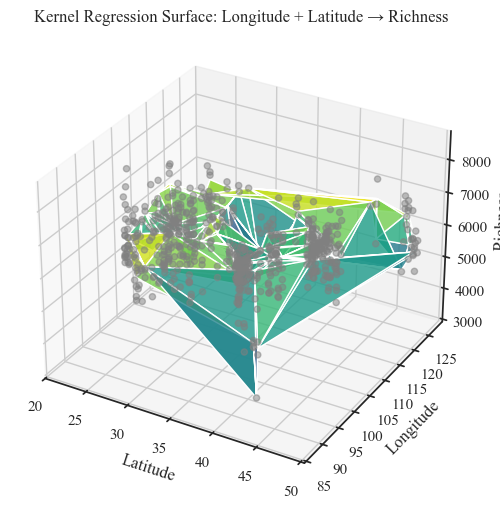

In [335]:
plt.figure(figsize= (6, 6))
ax = plt.axes(projection= "3d")
ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], y, label= 'richness', alpha=0.5, c='gray')
ax.plot_trisurf(X.iloc[:, 0], X.iloc[:, 1], y_pred, cmap= plt.cm.viridis, alpha=0.8)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Richness')
ax.set_title('Kernel Regression Surface: Longitude + Latitude → Richness')

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg


# 变量
X = metainfo_diversity[['Latitude']]
y = metainfo_diversity['richness']

# 拟合核回归模型，自变量是连续的
kr = KernelReg(endog=y, exog=X, var_type='c')  # 两个连续变量

# 对所有点进行预测（回归）
y_pred, y_std = kr.fit(X)

Text(0.5, 1.0, 'Kernel regression')

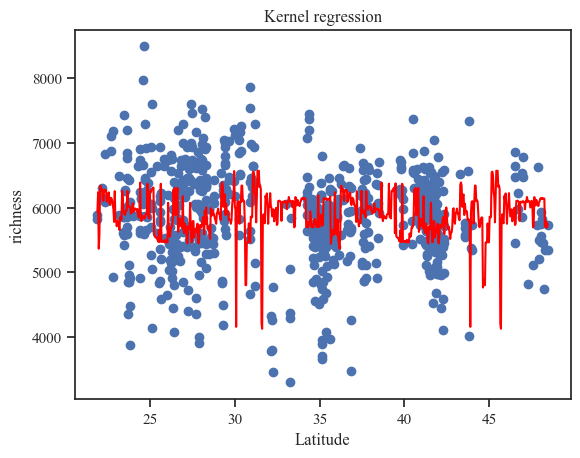

In [366]:
plt.figure()
fited_x = np.arange(X.values.min(), X.values.max(), (X.values.max()-X.values.min())/len(y_pred))
plt.scatter(x=X.iloc[:, 0], y=y)
plt.plot(fited_x, y_pred, color= "red")
plt.xlabel('Latitude')
plt.ylabel('richness')
plt.title('Kernel regression')

### 5.3.4. <a id='toc5_3_4_'></a>[集成学习结合shap](#toc0_)

- 线性回归
- 随机森林
- XGBoost

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost  
from sklearn.metrics import r2_score


# ModelsModels
lin = LinearRegression().fit(X, y)
rf = RandomForestRegressor().fit(X, y)
xgb = xgboost.XGBRegressor().fit(X, y) 

# Print the results
print(f'Linear R2: {r2_score(y, lin.predict(X))}')
print(f'Random Forest R2: {r2_score(y, rf.predict(X))}')
print(f'XGBoost R2: {r2_score(y, xgb.predict(X))}')

Linear R2: 0.14573911865932787
Random Forest R2: 0.9181831219580789
XGBoost R2: 0.987951240220113


Text(0.5, 1.0, 'Feature Importances')

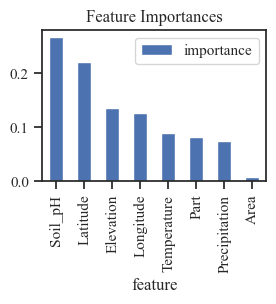

In [277]:
# print(f"Importances: {rf.feature_importances_}")
rf_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
rf_importances.sort_values(by='importance', ascending=False).plot.bar(x='feature', y='importance', figsize= (3, 3))
plt.tight_layout()
plt.title('Feature Importances')
# 这显示的是各个变量在决策过程中对分裂点贡献的平均程度。

In [173]:
lin_pred = lin.predict(X)
rf_pred = rf.predict(X)
xgb_pred = xgb.predict(X)

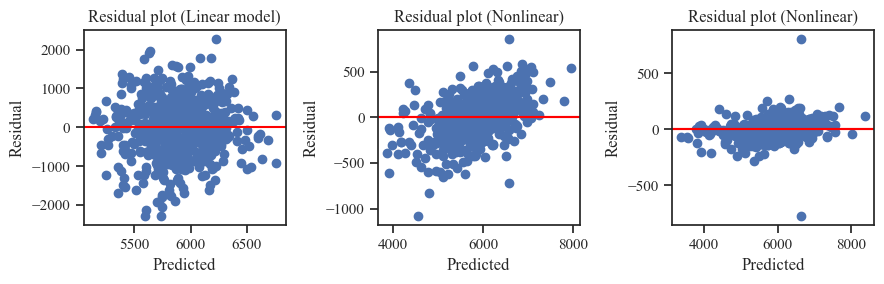

In [276]:
fig, ax = plt.subplots(1, 3, figsize= (9, 3))
ax[0].scatter(lin_pred, y-lin_pred)
ax[0].axhline(0, color='red')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Residual')
ax[0].set_title("Residual plot (Linear model)")
ax[1].scatter(rf_pred, y-rf_pred)
ax[1].axhline(0, color='red')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')
ax[1].set_title("Residual plot (Nonlinear)")
ax[1].axhline(0, color='red')
ax[2].scatter(xgb_pred, y-xgb_pred)
ax[2].axhline(0, color='red')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Residual')
ax[2].set_title("Residual plot (Nonlinear)")
ax[2].axhline(0, color='red')
fig.tight_layout()

#### 5.3.4.1. <a id='toc5_3_4_1_'></a>[Linear shap](#toc0_)

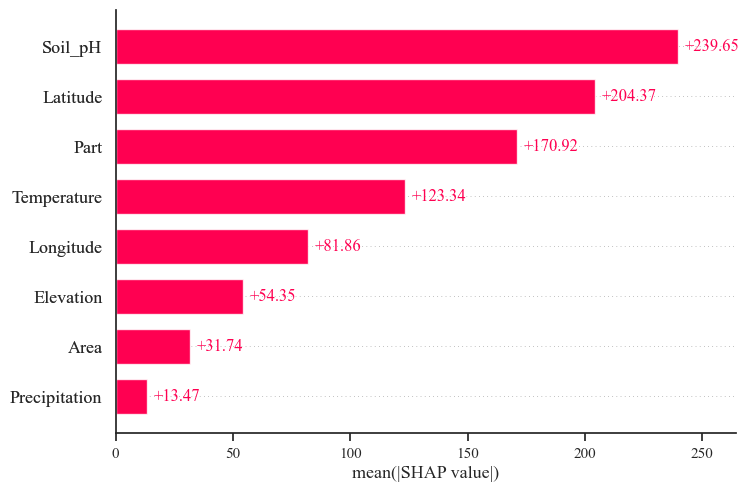

In [278]:
import shap 


explainer = shap.LinearExplainer(lin, X)
shap_values = explainer(X)

# 全局特征重要性可视化
shap.plots.bar(shap_values)

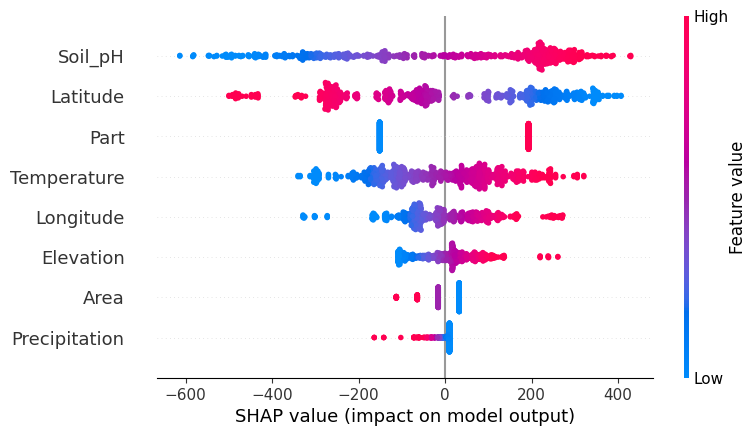

In [185]:
shap.plots.beeswarm(shap_values)

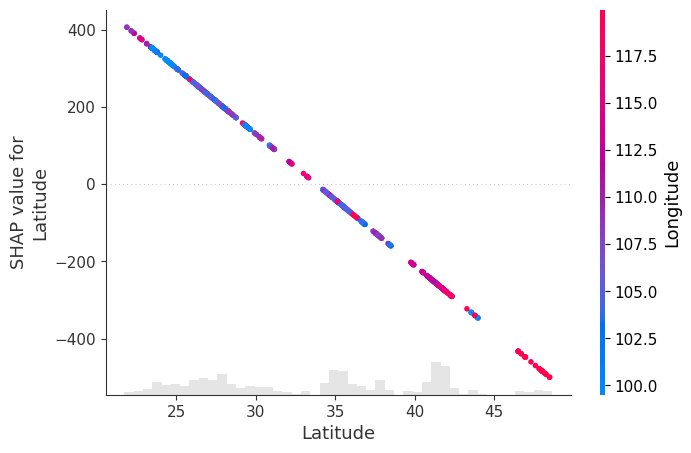

In [186]:
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)


#### 5.3.4.2. <a id='toc5_3_4_2_'></a>[Random forest shap](#toc0_)

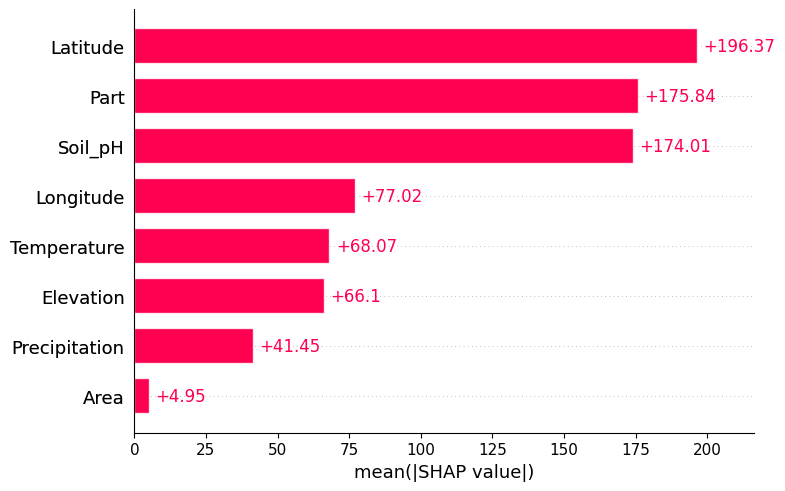

In [191]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer(X)

plt.figure()
# SHAP 解释每个特征对每个样本预测值的贡献（有方向、有量化），是目前解释黑箱模型的最佳工具之一。
shap.plots.bar(shap_values)

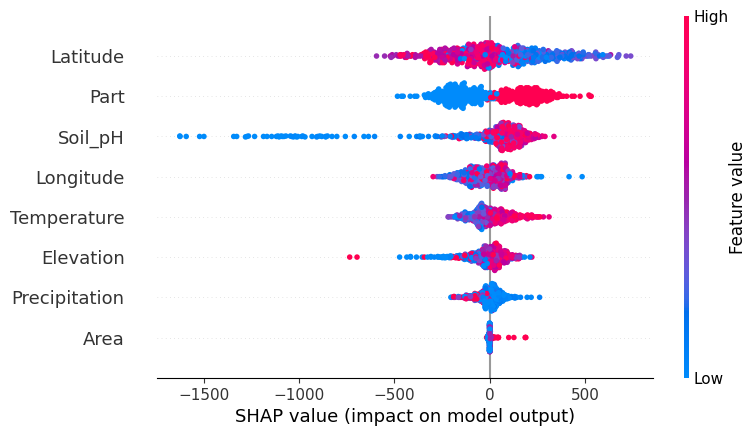

In [189]:
shap.plots.beeswarm(shap_values)

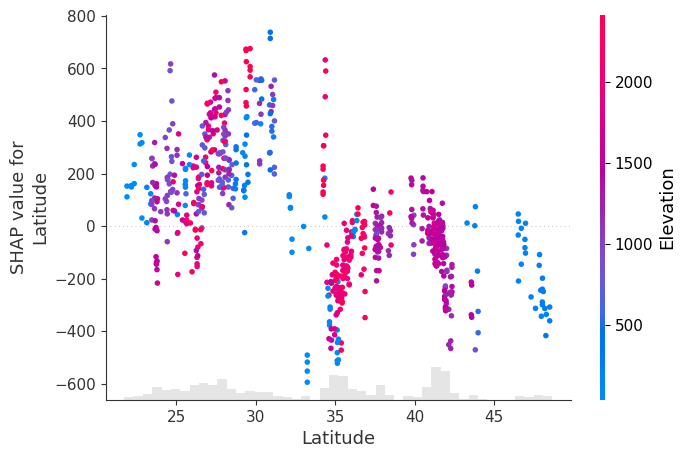

In [188]:
# 依赖图（单个特征）
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

#### 5.3.4.3. <a id='toc5_3_4_3_'></a>[XGBoost shap](#toc0_)

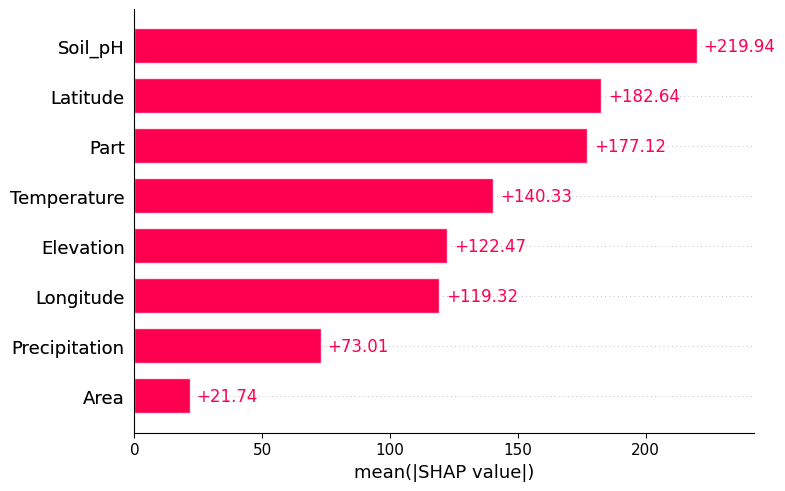

In [179]:
import shap 


# 创建 explainer（TreeExplainer 更快）
explainer = shap.Explainer(xgb, X)
shap_values = explainer(X)

# 📌 (a) 总体特征重要性条形图
shap.plots.bar(shap_values)

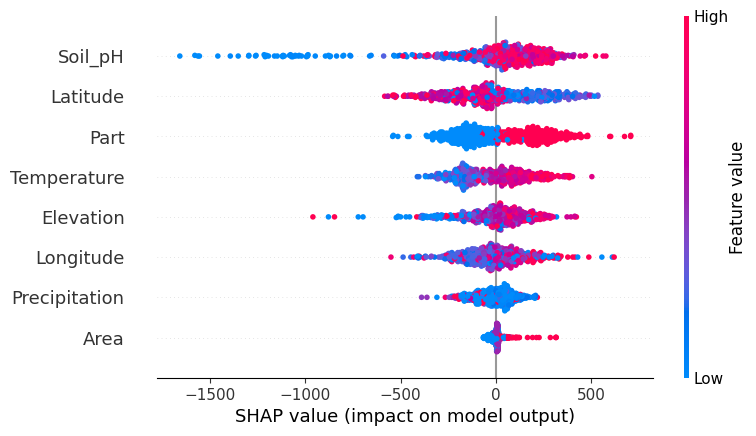

In [180]:
# 📌 (b) 每个样本的 SHAP 值图（类似热图）
shap.plots.beeswarm(shap_values)

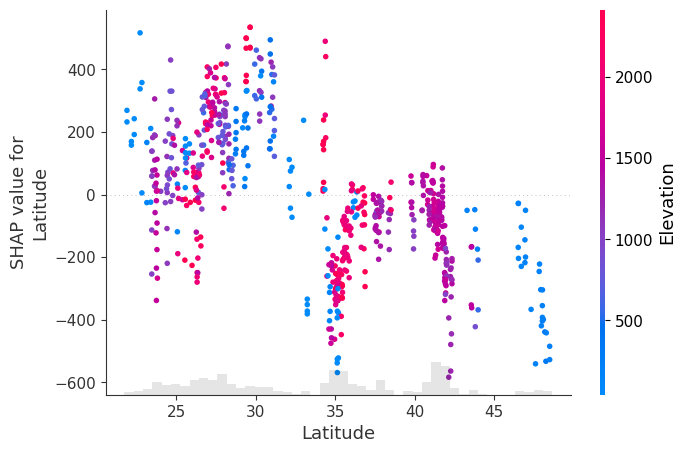

In [181]:
# 📌 (c) 单个变量的影响（Partial dependence）
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

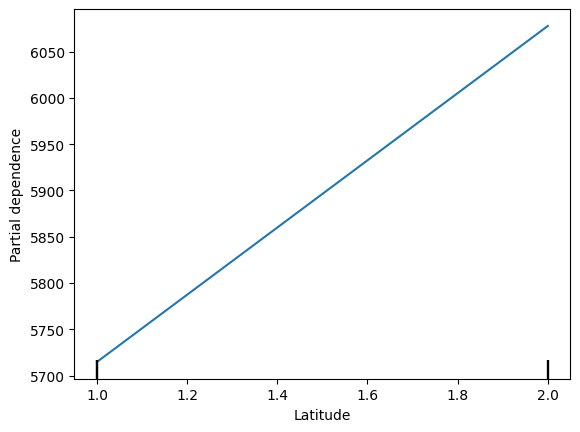

In [156]:
from sklearn.inspection import PartialDependenceDisplay


# 单个变量 PDP
PartialDependenceDisplay.from_estimator(xgb, X, features=[0], feature_names=['Latitude'])

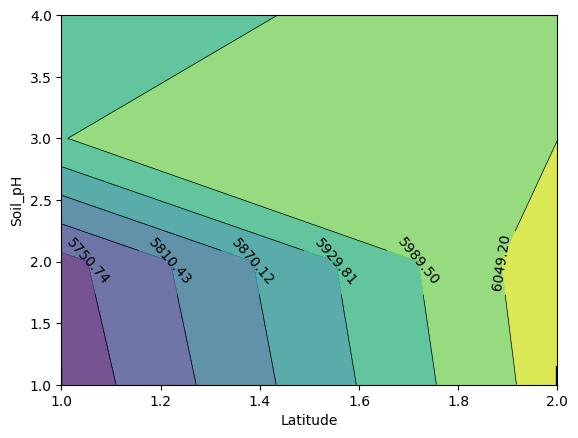

In [157]:
# 多个变量 PDP
PartialDependenceDisplay.from_estimator(xgb, X, features=[(0, 1)], feature_names=['Latitude', 'Soil_pH'])

## 5.4. <a id='toc5_4_'></a>[Soil pH](#toc0_)

In [284]:
pg.normality(data=metainfo_diversity['Soil_pH'])

W          pval  normal
Soil_pH  0.8907  1.776754e-21   False

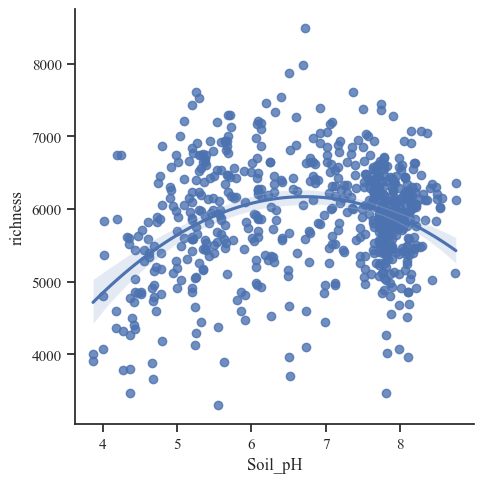

In [286]:
sns.lmplot(data=metainfo_diversity, x='Soil_pH', y='richness', order=2)

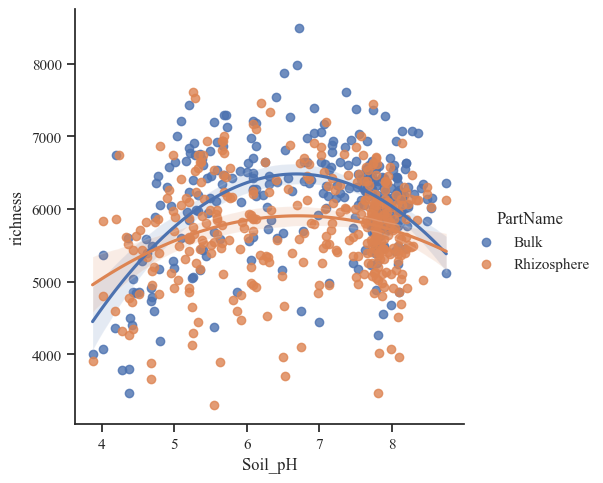

In [287]:
sns.lmplot(data=metainfo_diversity, x='Soil_pH', y='richness', order=2, hue= "PartName")

## 5.5. <a id='toc5_5_'></a>[Latitude](#toc0_)

In [288]:
pg.normality(data=metainfo_diversity['Latitude'])

W          pval  normal
Latitude  0.943645  2.413679e-15   False

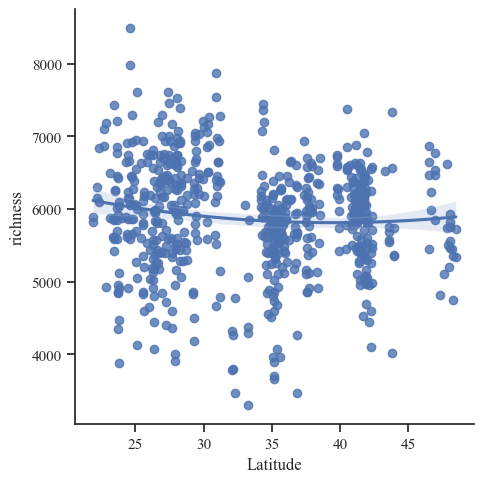

In [296]:
sns.lmplot(data=metainfo_diversity, x='Latitude', y='richness', order=2)

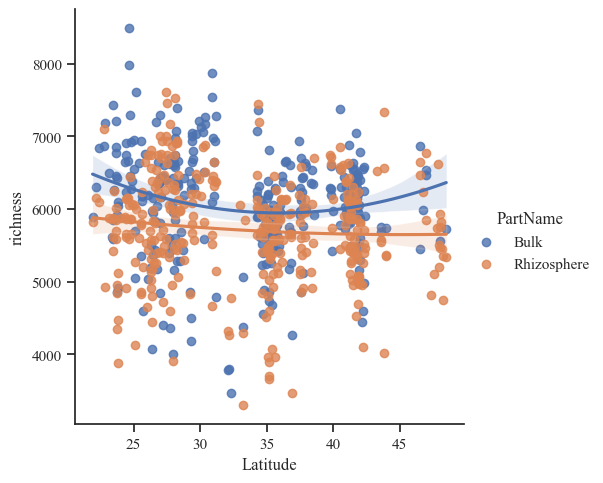

In [297]:
sns.lmplot(data=metainfo_diversity, x='Latitude', y='richness', order=2, hue='PartName')

## 5.6. <a id='toc5_6_'></a>[Part](#toc0_)

In [279]:
pg.normality(metainfo_diversity[metainfo_diversity['PartName'] == 'Bulk'][['richness']])

W      pval  normal
richness  0.975292  0.000027   False

In [280]:
pg.normality(metainfo_diversity[metainfo_diversity['PartName'] == 'Rhizosphere'][['richness']])

W      pval  normal
richness  0.986959  0.002678   False

In [281]:
# Nonparametic two samples
significance = pg.mwu(metainfo_diversity[metainfo_diversity['PartName'] == 'Bulk'][['richness']], metainfo_diversity[metainfo_diversity['PartName'] == 'Rhizosphere'][['richness']])
significance

U-val alternative         p-val       RBC      CLES
MWU  74100.5   two-sided  1.293726e-11  0.301344  0.650672

Bulk vs. Rhizosphere: Custom statistical test, P_val:1.294e-11


/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/statannotations/Annotator.py:644: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return values[group_struct['i_group_pair']]


(<Axes: xlabel='PartName', ylabel='richness'>,
 [<statannotations.Annotation.Annotation at 0x7f40824c1e10>])

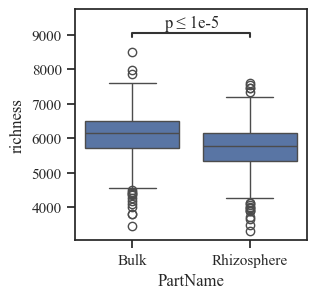

In [283]:
import itertools
import seaborn as sns 
from statannotations.Annotator import Annotator


plt.figure(figsize= (3, 3))
ax = sns.boxplot(data= metainfo_diversity, x= "PartName", y= "richness")

# 显著性对比组
# 自动生成所有两两组合的比较对
# pairs = [("A", "B"), ("A", "C"), ("B", "C")]
pairs = list(itertools.combinations(metainfo_diversity['PartName'].unique(), 2))

# p_values = [dunn_result.loc[pair[0], pair[1]] for pair in pairs]
p_values = significance['p-val']

# 添加显著性标注
annotator = Annotator(ax, pairs, data= metainfo_diversity, x= 'PartName', y= 'richness')
annotator.configure(test= None, text_format= 'simple')
annotator.set_pvalues(p_values)
annotator.annotate()

<Axes: xlabel='PartName', ylabel='richness'>

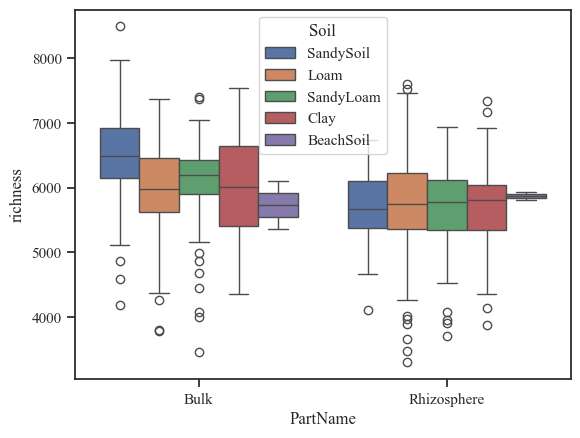

In [321]:
sns.boxplot(data=metainfo_diversity, x='PartName', y='richness', hue='Soil')

## 5.7. <a id='toc5_7_'></a>[Area](#toc0_)

In [298]:
pg.normality(data=metainfo_diversity, dv='richness', group='AreaName')

W      pval  normal
AreaName                                            
Southwest Winter-Spring   0.995206  0.633742    True
Northern Single-cropping  0.985815  0.001715   False
Central Double-cropping   0.928208  0.001848   False
Southern Winter-cropping  0.927789  0.124293    True

In [303]:
pg.kruskal(data=metainfo_diversity, dv='richness', between='AreaName')
# pg.kruskal?

Source  ddof1          H     p-unc
Kruskal  AreaName      3  16.194175  0.001035

In [308]:
# 事后检验：Dunn's test
dunn_result = sp.posthoc_dunn(metainfo_diversity, val_col= "richness", group_col= "AreaName", p_adjust= "bonferroni")
dunn_result

Central Double-cropping  Northern Single-cropping  \
Central Double-cropping                  1.000000                  1.000000   
Northern Single-cropping                 1.000000                  1.000000   
Southern Winter-cropping                 0.047991                  0.049082   
Southwest Winter-Spring                  0.133506                  0.014870   

                          Southern Winter-cropping  Southwest Winter-Spring  
Central Double-cropping                   0.047991                 0.133506  
Northern Single-cropping                  0.049082                 0.014870  
Southern Winter-cropping                  1.000000                 0.788938  
Southwest Winter-Spring                   0.788938                 1.000000

Southwest Winter-Spring vs. Northern Single-cropping: Custom statistical test, P_val:1.487e-02
Northern Single-cropping vs. Central Double-cropping: Custom statistical test, P_val:1.000e+00
Central Double-cropping vs. Southern Winter-cropping: Custom statistical test, P_val:4.799e-02
Southwest Winter-Spring vs. Central Double-cropping: Custom statistical test, P_val:1.335e-01
Northern Single-cropping vs. Southern Winter-cropping: Custom statistical test, P_val:4.908e-02
Southwest Winter-Spring vs. Southern Winter-cropping: Custom statistical test, P_val:7.889e-01


/tmp/ipykernel_2285157/3784566488.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)


(<Axes: xlabel='AreaName', ylabel='richness'>,
  <statannotations.Annotation.Annotation at 0x7f4093a82740>])

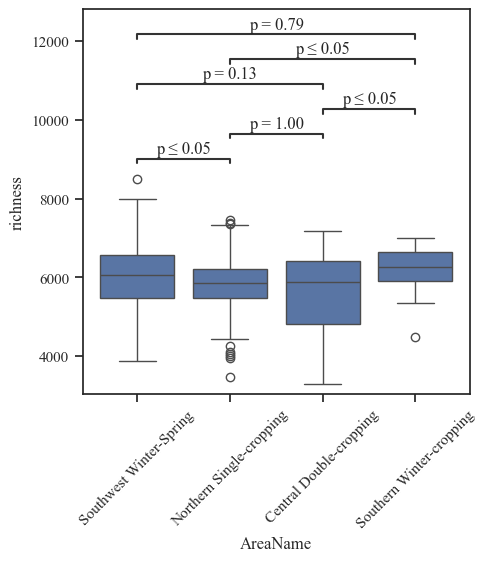

In [314]:
import itertools
import seaborn as sns 
from statannotations.Annotator import Annotator


plt.figure(figsize= (5, 5))
ax = sns.boxplot(data= metainfo_diversity, x= "AreaName", y= "richness")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

# 显著性对比组
# 自动生成所有两两组合的比较对
# pairs = [("A", "B"), ("A", "C"), ("B", "C")]
pairs = list(itertools.combinations(metainfo_diversity['AreaName'].unique(), 2))

p_values = [dunn_result.loc[pair[0], pair[1]] for pair in pairs]
# p_values = significance['p-val']

# 添加显著性标注
annotator = Annotator(ax, pairs, data= metainfo_diversity, x= 'AreaName', y= 'richness')
annotator.configure(test= None, text_format= 'simple')
annotator.set_pvalues(p_values)
annotator.annotate()

## 5.8. <a id='toc5_8_'></a>[Longitude](#toc0_)

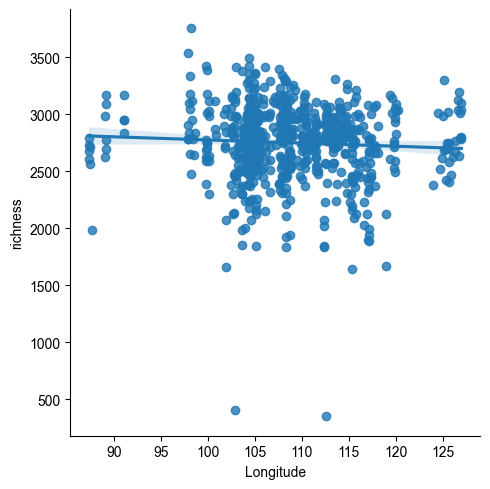

In [41]:
sns.lmplot(data= metainfo_diversity, x= "Longitude", y= "richness")

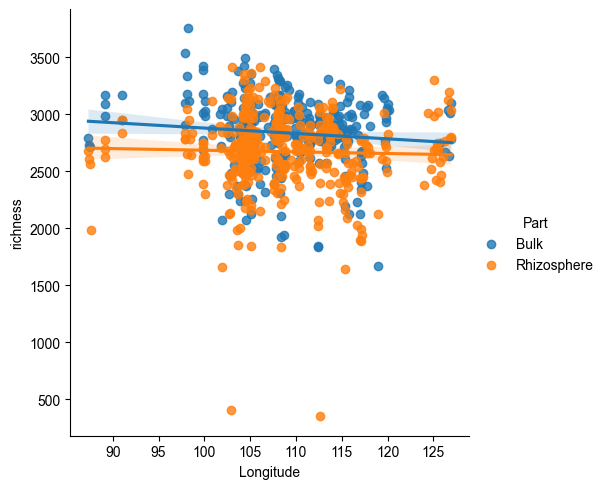

In [42]:
sns.lmplot(data= metainfo_diversity, x= "Longitude", y= "richness", hue= "Part")

## 5.9. <a id='toc5_9_'></a>[Altitude](#toc0_)

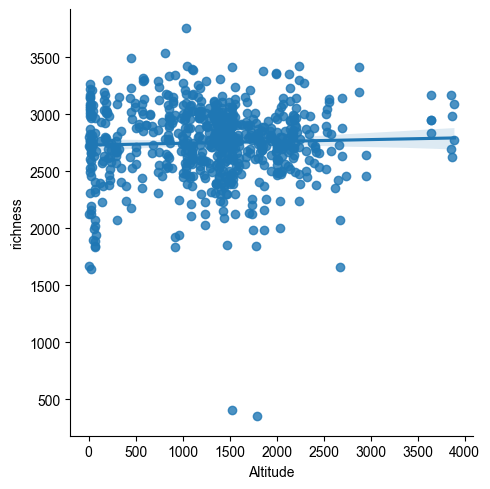

In [45]:
sns.lmplot(data= metainfo_diversity, x= "Altitude", y= "richness")

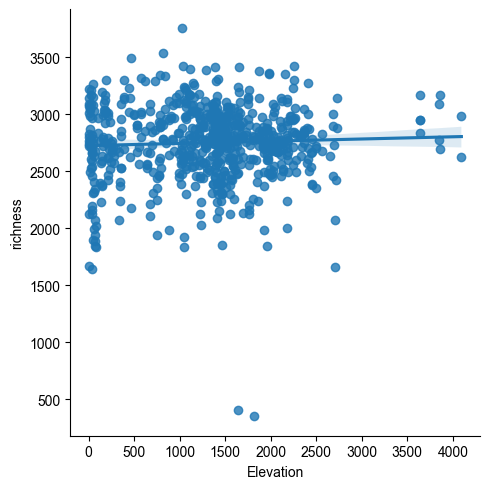

In [46]:
sns.lmplot(data= metainfo_diversity, x= "Elevation", y= "richness")

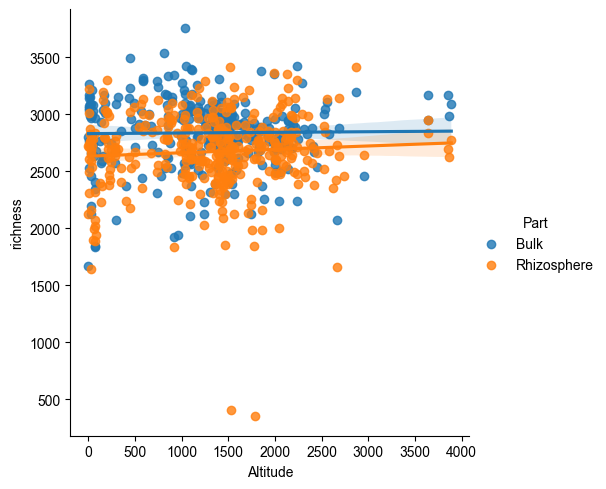

In [47]:
sns.lmplot(data= metainfo_diversity, x= "Altitude", y= "richness", hue= "Part")

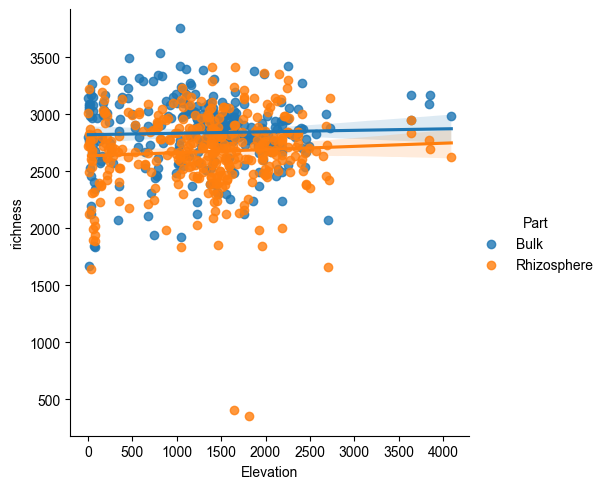

In [48]:
sns.lmplot(data= metainfo_diversity, x= "Elevation", y= "richness", hue= "Part")

## 5.10. <a id='toc5_10_'></a>[Temperature](#toc0_)

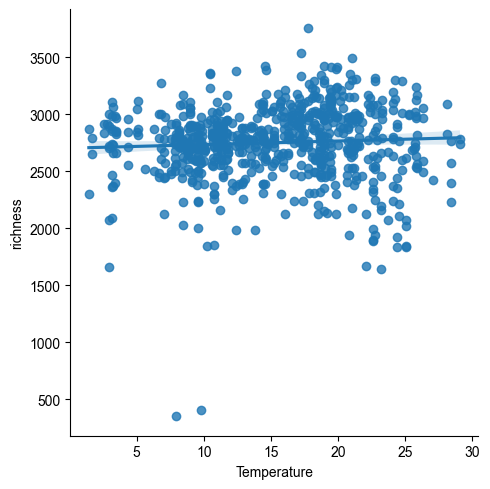

In [49]:
sns.lmplot(data= metainfo_diversity, x= "Temperature", y= "richness")

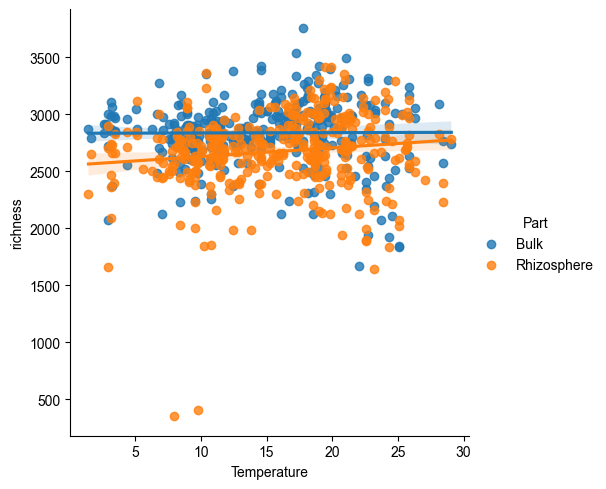

In [50]:
sns.lmplot(data= metainfo_diversity, x= "Temperature", y= "richness", hue= "Part")

## 5.11. <a id='toc5_11_'></a>[Precipitation](#toc0_)

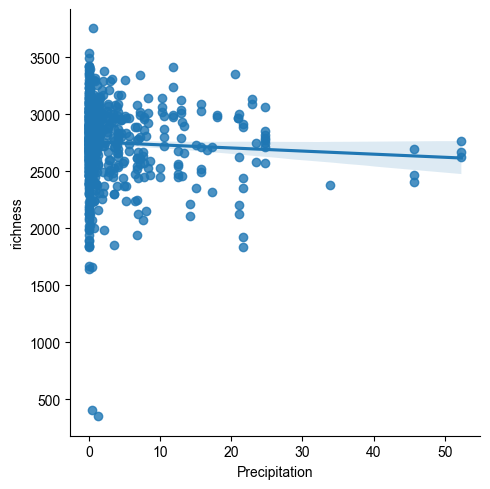

In [51]:
sns.lmplot(data= metainfo_diversity, x= "Precipitation", y= "richness")

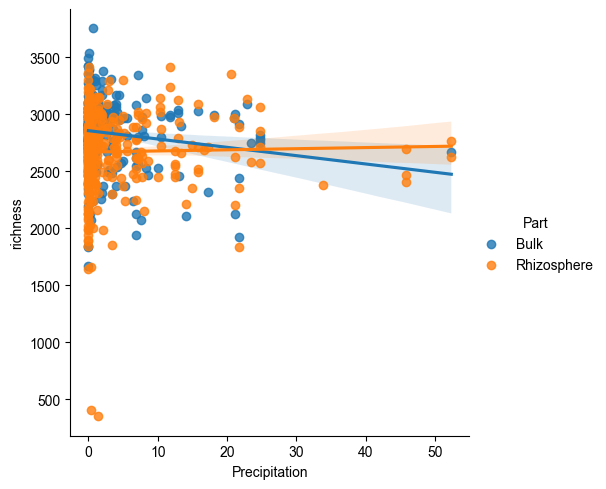

In [52]:
sns.lmplot(data= metainfo_diversity, x= "Precipitation", y= "richness", hue= "Part")

## 5.12. <a id='toc5_12_'></a>[Soil](#toc0_)

In [315]:
pg.normality(data=metainfo_diversity, dv='richness', group='Soil')

W      pval  normal
Soil                                 
SandySoil  0.989619  0.846960    True
Loam       0.985607  0.001441   False
SandyLoam  0.947491  0.000001   False
Clay       0.988158  0.849602    True
BeachSoil  0.935473  0.626926    True

In [316]:
pg.kruskal(data=metainfo_diversity, dv='richness', between='Soil')

Source  ddof1         H     p-unc
Kruskal   Soil      4  3.675037  0.451767

<Axes: xlabel='Soil', ylabel='richness'>

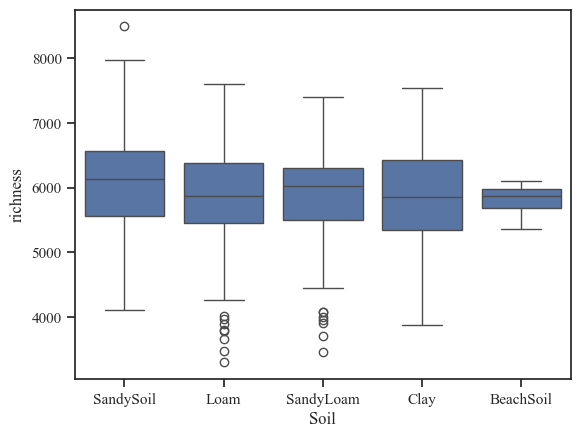

In [317]:
sns.boxplot(data= metainfo_diversity, x= "Soil", y= "richness")

<Axes: xlabel='Soil', ylabel='richness'>

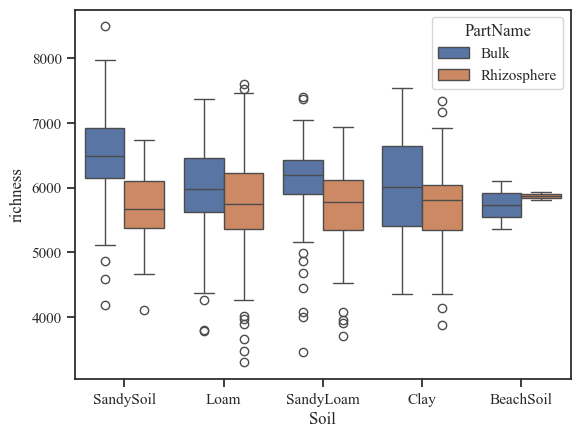

In [319]:
sns.boxplot(data= metainfo_diversity, x= "Soil", y= "richness", hue= "PartName")

## 5.13. <a id='toc5_13_'></a>[Breeding](#toc0_)

<Axes: xlabel='Breeding', ylabel='richness'>

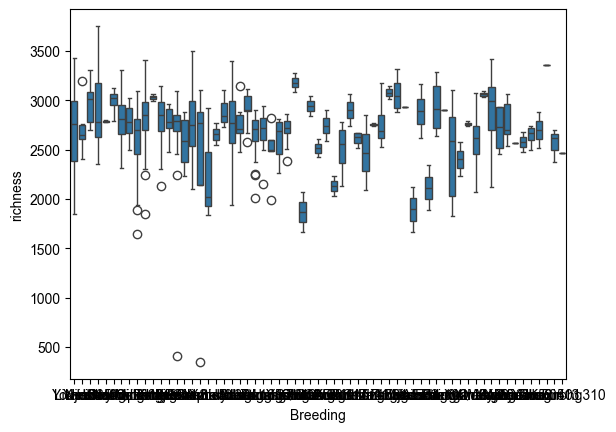

In [57]:
sns.boxplot(data= metainfo_diversity, x= "Breeding", y= "richness")

<Axes: xlabel='Breeding', ylabel='richness'>

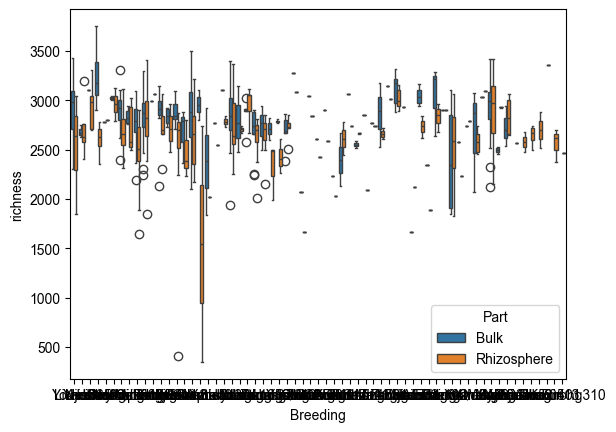

In [58]:
sns.boxplot(data= metainfo_diversity, x= "Breeding", y= "richness", hue= "Part")

## 5.14. <a id='toc5_14_'></a>[Previous crop](#toc0_)

<Axes: xlabel='PreviousCrop', ylabel='richness'>

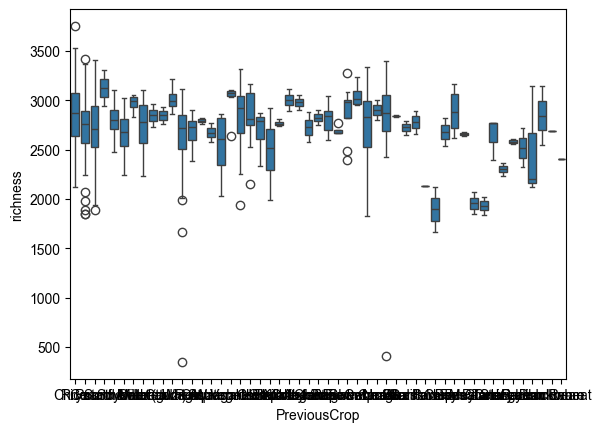

In [59]:
sns.boxplot(data= metainfo_diversity, x= "PreviousCrop", y= "richness")

<Axes: xlabel='PreviousCrop', ylabel='richness'>

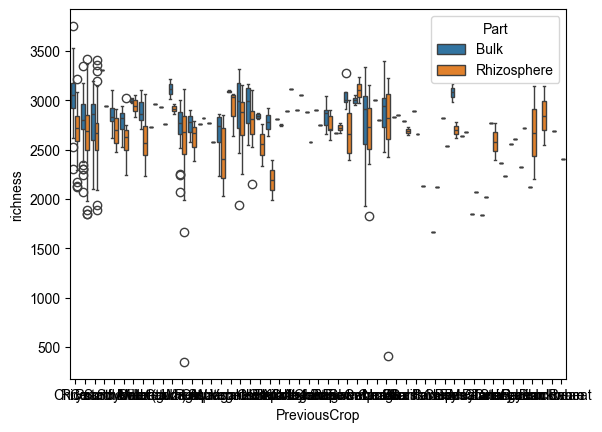

In [60]:
sns.boxplot(data= metainfo_diversity, x= "PreviousCrop", y= "richness", hue= "Part")

## 5.15. <a id='toc5_15_'></a>[Mode](#toc0_)

<Axes: xlabel='Mode', ylabel='richness'>

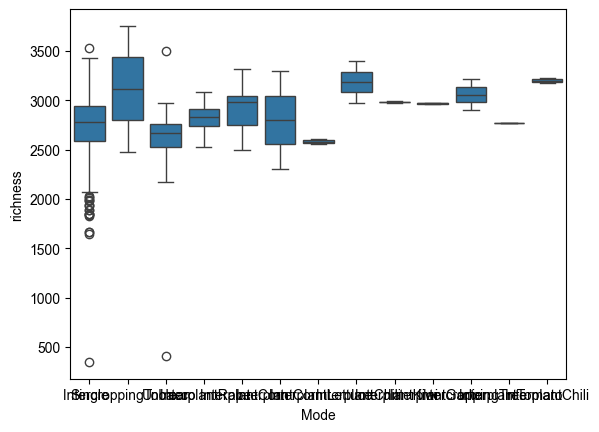

In [61]:
sns.boxplot(data= metainfo_diversity, x= "Mode", y= "richness")

<Axes: xlabel='Mode', ylabel='richness'>

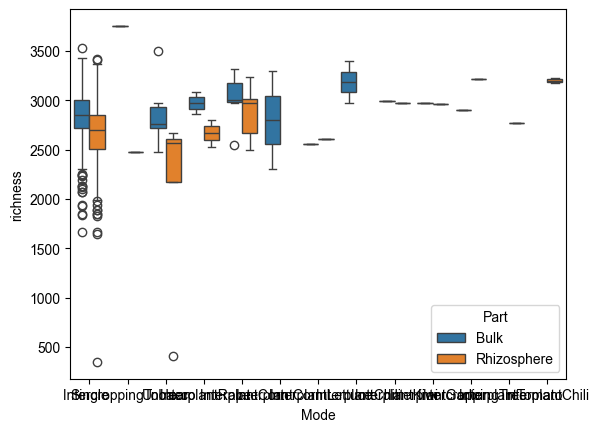

In [62]:
sns.boxplot(data= metainfo_diversity, x= "Mode", y= "richness", hue= "Part")

## 5.16. <a id='toc5_16_'></a>[Early blight](#toc0_)

<Axes: xlabel='EarlyBlight', ylabel='richness'>

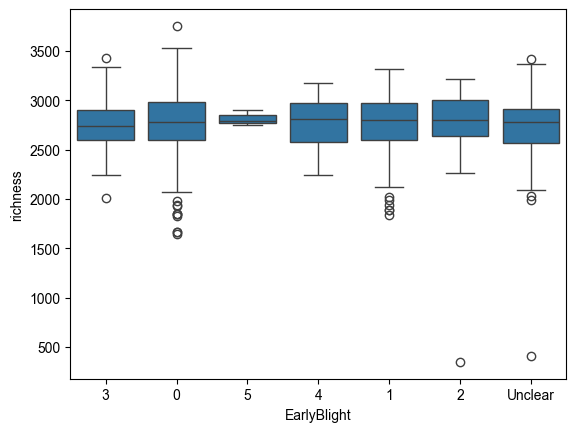

In [63]:
sns.boxplot(data= metainfo_diversity, x= "EarlyBlight", y= "richness")

<Axes: xlabel='Batch', ylabel='richness'>

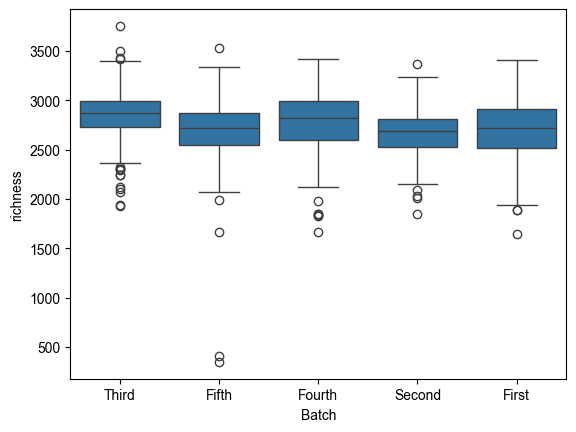

In [64]:
sns.boxplot(data= metainfo_diversity, x= "Batch", y= "richness")

# 6. <a id='toc6_'></a>[Differentail analysis](#toc0_)

In [304]:
import pingouin as pg 
import scikit_posthocs as sp 

In [66]:
# 正态性检验
pg.normality(data= metainfo_diversity, dv= "richness", group= "Part")

W          pval  normal
Part                                       
Bulk         0.960251  8.151475e-08   False
Rhizosphere  0.890093  1.575478e-15   False

In [67]:
# 方差齐性检验
pg.homoscedasticity(data= metainfo_diversity, dv= "richness", group= "Part")

W      pval  equal_var
levene  2.142459  0.143726       True

In [68]:
significance = pg.mwu(x= metainfo_diversity[metainfo_diversity['Part'] == 'Rhizosphere']['richness'], y= metainfo_diversity[metainfo_diversity['Part'] == 'Bulk']['richness'], alternative= 'two-sided')
significance

U-val alternative         p-val       RBC      CLES
MWU  40320.0   two-sided  5.047809e-14 -0.330511  0.334745

In [69]:
# Kruskal-Wallis H 检验
pg.kruskal(data= metainfo_diversity, dv= "richness", between= "Part")

Source  ddof1          H         p-unc
Kruskal   Part      1  56.713938  5.040501e-14

In [70]:
# 事后检验：Dunn's test
dunn_result = sp.posthoc_dunn(metainfo_diversity, val_col= "richness", group_col= "Part", p_adjust= "bonferroni")
dunn_result

Bulk   Rhizosphere
Bulk         1.000000e+00  5.040501e-14
Rhizosphere  5.040501e-14  1.000000e+00

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bulk vs. Rhizosphere: Custom statistical test, P_val:5.048e-14


/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/statannotations/Annotator.py:644: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return values[group_struct['i_group_pair']]


(<Axes: xlabel='Part', ylabel='richness'>,
 [<statannotations.Annotation.Annotation at 0x7f6653327770>])

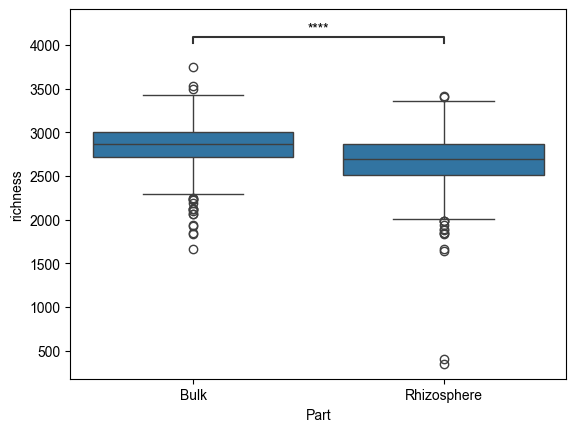

In [71]:
import itertools
import seaborn as sns 
from statannotations.Annotator import Annotator


ax = sns.boxplot(data= metainfo_diversity, x= "Part", y= "richness")

# 显著性对比组
# 自动生成所有两两组合的比较对
# pairs = [("A", "B"), ("A", "C"), ("B", "C")]
pairs = list(itertools.combinations(metainfo_diversity['Part'].unique(), 2))

# p_values = [dunn_result.loc[pair[0], pair[1]] for pair in pairs]
p_values = significance['p-val']

# 添加显著性标注
annotator = Annotator(ax, pairs, data= metainfo_diversity, x= 'Part', y= 'richness')
annotator.configure(test= None, text_format= 'star')
annotator.set_pvalues(p_values)
annotator.annotate()

# 7. <a id='toc7_'></a>[多因素影响分析](#toc0_)

## 7.1. <a id='toc7_1_'></a>[OLS](#toc0_)

多重 OLS 回归（Multiple Ordinary Least Squares Regression）：
- 作用：探索多个环境因子对细菌多样性指标（如 Shannon 指数）的线性解释能力。
- 输入：X（多个因子），Y（多样性值）
- 优点：结果直观，R² 表示解释度；可计算每个变量的显著性（p 值）

🔍 结果解读：
- coef：变量回归系数
- p-value：显著性
- R²：模型解释力

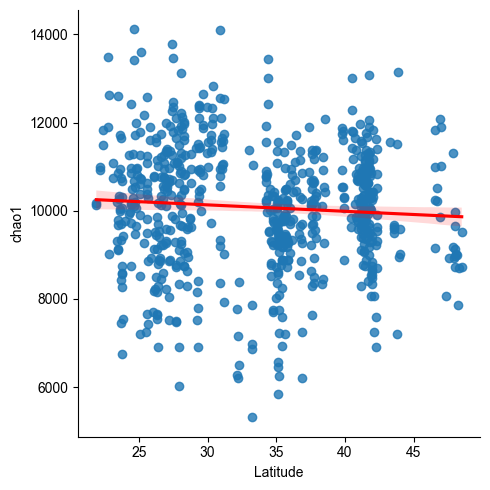

In [358]:
sns.lmplot(data=metainfo_diversity, x='Latitude', y='chao1', line_kws= {"color": "red"})

In [ ]:
from sklearn.linear_model import LinearRegression
X = metainfo_diversity[['Latitude']]
y = metainfo_diversity[['chao1']]
model = LinearRegression().fit(X, y)
# 拿参数
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# print(f"回归参数：slope = {slope:.4f}, intercept = {intercept:.4f}, R² = {r2:.4f}")
slope, intercept, r2

(array([-14.56121053]), array([10569.91335491]), 0.0051864562512341505)

In [337]:
X = metainfo_diversity[["Latitude"]]
y = metainfo_diversity[["chao1"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  chao1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.587
Date:                Sun, 15 Jun 2025   Prob (F-statistic):             0.0587
Time:                        21:19:20   Log-Likelihood:                -5966.3
No. Observations:                 690   AIC:                         1.194e+04
Df Residuals:                     688   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+04    265.505     39.811      0.0

In [50]:
import statsmodels.api as sm 


X = metainfo_diversity[["Longitude", "Latitude"]]
y = metainfo_diversity[["richness"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               richness   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.093
Date:                Mon, 16 Jun 2025   Prob (F-statistic):             0.0460
Time:                        10:38:02   Log-Likelihood:                -5398.8
No. Observations:                 690   AIC:                         1.080e+04
Df Residuals:                     687   BIC:                         1.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5412.9949    376.882     14.363      0.0

## 7.2. <a id='toc7_2_'></a>[CCA/RDA](#toc0_)

冗余分析（RDA, Redundancy Analysis）
- 作用：用于解释群落结构与环境因子之间的线性关系
- 本质：PCA + 多元线性回归
- 输入：群落矩阵（如 OTU 表）与环境矩阵（如 pH、TOC）
- 输出：群落结构中被解释的变异比例（R²、调整后的 R²）

In [73]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


# 标准化 OTU 表和环境因子
otu_std = (otu_data - otu_data.mean()) / otu_data.std()
env_std = (env_data - env_data.mean()) / env_data.std()

# 线性拟合 OTU ← env
rda_model = LinearRegression().fit(env_std, otu_std)
fitted = rda_model.predict(env_std)

# PCA on fitted OTU matrix
pca = PCA(n_components=2)
rda_scores = pca.fit_transform(fitted)


NameError: name 'otu_data' is not defined

In [ ]:
from sklearn.cross_decomposition import CCA


cca = CCA(n_components= 1)
cca.fit(metainfo_diversity[["Longitude", "Latitude", "Altitude", "Soil_pH"]], metainfo_diversity["richness"])

CCA(n_components=1)

## 7.3. <a id='toc7_3_'></a>[Sliding Window + Hierarchical Partitioning](#toc0_)

移动窗口结合层级划分法（Sliding Window + Hierarchical Partitioning）
- 滑动窗口：沿时间或空间（如纬度）滑动，局部分析因子贡献
- 层级划分法：计算每个变量的独立解释量 vs 与其他变量的交互解释量
- 目的：分析在不同空间/时间段中，不同因子作用是否稳定

## 7.4. <a id='toc7_4_'></a>[Random Forest/XGBoost](#toc0_)

随机森林（Random Forest）
- 作用：评估各环境因子对微生物多样性或群落结构的非线性影响
- 优势：处理多变量、变量间共线性强、无需变量分布假设
- 结果：提供每个变量的重要性得分（feature importance）

In [51]:
from sklearn.ensemble import RandomForestRegressor 


rf = RandomForestRegressor(n_estimators= 500)
rf.fit(metainfo_diversity[["Longitude", "Latitude"]], metainfo_diversity[["richness"]])


/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500)

In [52]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': ["Longitude", "Latitude"],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [53]:
feature_importance_df

Feature  Importance
1   Latitude     0.53772
0  Longitude     0.46228

## 7.5. <a id='toc7_5_'></a>[PLS-PM / PLS-SEM](#toc0_)

偏最小二乘路径建模（PLS-PM / PLS-SEM）
- 作用：建构环境→中介变量→微生物结构的路径因果模型
- 输入：多个变量块（如环境、生物、群落结构），构建结构路径图
- 适用性：变量间有中介作用、或推测因果路径时非常有用

>Python 中 pyPLS 或使用 smartPLS 软件，R 中 plspm 包常用。

In [ ]:
from sklearn.cross_decomposition import PLSRegression 


pls = PLSRegression(n_components=2)
pls.fit(metainfo_diversity[["Longitude", "Latitude", "Altitude", "Soil_pH"]], metainfo_diversity[["richness", "shannon_e"]])

PLSRegression()

In [ ]:
print(pls.coef_)

[[ 1.69374338e+00 -1.18841454e+01 -1.72048624e-02  7.58973343e+01]
 [ 1.89765612e-04 -6.13984856e-03 -4.14763960e-06  3.76036791e-02]]


🔄 各方法比较与组合建议

| 方法        | 是否解释群落结构 | 是否解释多样性 | 是否考虑非线性 | 可解释路径机制 |
| --------- | -------- | ------- | ------- | ------- |
| OLS       | ❌        | ✅       | ❌       | ❌       |
| RDA       | ✅        | ❌       | ❌       | ❌       |
| 层级划分 + 滑窗 | ✅        | ✅       | ❌       | ❌       |
| 随机森林      | ✅        | ✅       | ✅       | ❌       |
| PLS-PM    | ✅        | ✅       | ✅       | ✅       |

📌 小结：推荐组合策略
- 多样性指标（如 Shannon） → 用 OLS + RF
- 群落结构变异（OTU 表） → 用 RDA + 滑动窗口
- 整体变量贡献解释 → 用 层级划分法
- 探讨路径和机制（如 pH→微生物网络→Shannon） → 用 PLS-PM

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
df = pd.DataFrame({
    'pH': np.random.normal(6.5, 0.2, 100),
    'TOC': np.random.normal(2.5, 0.5, 100),
    'TN': np.random.normal(0.3, 0.05, 100),
    'shannon1': np.random.normal(4.2, 0.3, 100),
    'shannon2': np.random.normal(4.3, 0.3, 100),
    'bray': np.random.normal(0.5, 0.1, 100),
    'jaccard': np.random.normal(0.6, 0.1, 100)
})

df

pH       TOC        TN  shannon1  shannon2      bray   jaccard
0   6.599343  1.792315  0.317889  3.951301  3.821672  0.592618  0.675699
1   6.472347  2.289677  0.328039  4.031946  4.120187  0.690942  0.507783
2   6.629538  2.328643  0.354153  4.424188  4.301573  0.360143  0.686961
3   6.804606  2.098861  0.352690  4.383111  4.314094  0.556297  0.735564
4   6.453169  2.419357  0.231117  4.193730  4.164980  0.434936  0.641343
..       ...       ...       ...       ...       ...       ...       ...
95  6.207297  2.692659  0.265355  4.059247  4.461673  0.448998  0.569045
96  6.559224  2.058071  0.344980  3.686060  3.988826  0.473013  0.632613
97  6.552211  2.576863  0.315365  4.606162  4.242898  0.402124  0.474889
98  6.501023  2.529104  0.340643  4.165638  4.037315  0.455571  0.692403
99  6.453083  1.928515  0.331481  4.571345  3.885160  0.537730  0.581510

[100 rows x 7 columns]

In [ ]:
from semopy import Model

desc = """
# 结构模型
Community ~ Environment
Diversity ~ Community

# 测量模型
Environment =~ Longitude + Latitude + Altitude + Soil_pH
Community =~ bray + jaccard
Diversity =~ shannon1 + shannon2
"""
model = Model(desc)
model.fit(df)
# 路径系数
# print(model.inspect(std_est=True))
model.inspect(std_est=True)

lval  op         rval      Estimate      Est. Std  Std. Err  \
0     Community   ~  Environment -1.627355e-01 -2.221270e-01  0.202838   
1     Diversity   ~    Community  2.099362e-01  9.999999e-01  0.890876   
2            pH   ~  Environment  1.000000e+00  6.940482e-01         -   
3           TOC   ~  Environment -5.751884e-01 -1.521026e-01  0.800562   
4            TN   ~  Environment  1.269603e-01  2.952544e-01  0.154791   
5          bray   ~    Community  1.000000e+00  1.000000e+00         -   
6       jaccard   ~    Community -9.639243e-02 -8.343252e-02  0.404078   
7      shannon1   ~    Diversity  1.000000e+00  7.309972e-02         -   
8      shannon2   ~    Diversity -1.458940e+00 -8.866792e-02  2.578385   
9     Community  ~~    Community  8.029725e-03  9.506596e-01  0.033963   
10    Diversity  ~~    Diversity  7.130073e-11  1.915330e-07  0.005898   
11  Environment  ~~  Environment  1.573670e-02  1.000000e+00  0.019382   
12           TN  ~~           TN  2.656098e-03  9.128249e-01  0.000488   
13          TOC  ~~          TOC  2.198341e-01  9.768648e-01  0.032113   
14         bray  ~~         bray  7.823915e-11  9.262933e-09   0.03394   
15      jaccard  ~~      jaccard  1.119585e-02  9.930390e-01  0.001614   
16           pH  ~~           pH  1.693219e-02  5.182971e-01  0.019126   
17     shannon1  ~~     shannon1  6.929342e-02  9.946564e-01  0.011339   
18     shannon2  ~~     shannon2  9.999179e-02  9.921380e-01   0.01864   

     z-value   p-value  
0  -0.802292  0.422384  
1   0.235651  0.813703  
2          -         -  
3   -0.71848  0.472461  
4   0.820202  0.412101  
5          -         -  
6  -0.238549  0.811455  
7          -         -  
8  -0.565835  0.571506  
9   0.236424  0.813104  
10       0.0       1.0  
11  0.811905  0.416846  
12   5.44098       0.0  
13   6.84564       0.0  
14       0.0       1.0  
15  6.934855       0.0  
16  0.885299  0.375995  
17   6.11081       0.0  
18   5.36439       0.0

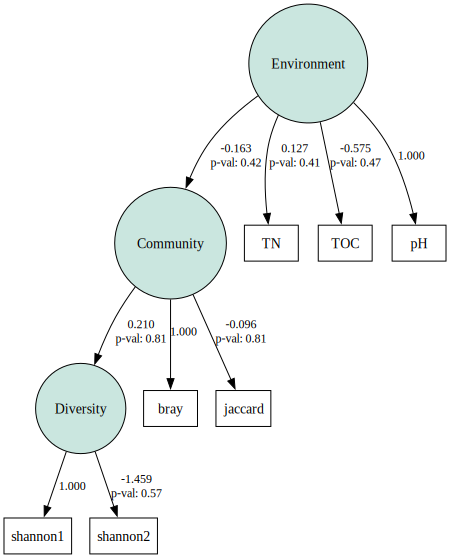

In [ ]:
# # 可视化结构图
# from semopy import plot_model
# plot_model(model, show=True)

import semopy 
semopy.semplot(model, "caches/semopy.png")

# 